# what does this notebook contain?

### 1. Price and quantity( production) estimation 

For fresh market blueberries of North Carolina and California, there was no data for some years. We used regression to estimate this data. 

### 2. Distributing yearly production data to months.
We only have yearly production data. So we estimate monthly production data for each state.

### 3. Merging of shipping point, terminal market and import quantity into one dataset for Chile, Peru, Mexico and Canada


### 4. Terminal and Shipping point price data manipulation for domestic states

From a single file which contains terminal market data for the states we are interested in, we extract individual datasets for each state. We do the same thing for shipping point and merge the datasets.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from datetime import datetime

# Forecasting for California Production for fresh market blueberries

### fmarket:
The data on blueberries is collected by NASS through census or survey. Through census they collect data on organic blueberries. 
It has many layers to it:
- Blueberries, Tame, Organic-Production, measured in lb
- Blueberries, Tame, Organic, Fresh market-production,measured in lb
- Blueberries, Tame, Organic, Processing- production, measured in lb
- Blueberries,Wild, Organic-production, measured in lb

Through surveys they collect data on fresh market production:

- Blueberries, Tame- Production, measured in lb (`tame_production`)
- Blueberries, Tame,Fresh Market- Prodcution, Measured in lb (`fmarket`)
- Blueberries, Tame, Not harvested- Prodcution, Measured in lb
- Blueberries, Tame, Not sold- Prodcution, Measured in lb
- Blueberries, Tame, Processing- Prodcution, Measured in lb
- Blueberries, Tame, Utilized- Prodcution, Measured in lb

Question:

Does fmarket contain information on  Blueberries, Tame, Organic, Fresh market-production,measured in lb?

This analysis assumes no. I have left a message at USDA NASS





In [2]:
year=[2011,2012,2018,2019,2020,2021]
fmarket=[42100000,40900000,52240000,56160000,62960000,58860000]
tame_production=[42100000,40900000,64900000,73700000,79300000,74500000]

In [3]:
data1 = pd.Series(fmarket, index=year)
data2=pd.Series(tame_production, index=year)
df = pd.DataFrame({'Fmarket':data1, 'Total_fresh':data2})

In [4]:
model=sm.OLS.from_formula('Fmarket ~ Total_fresh',data=df).fit()

In [5]:
print(model.params)

Intercept      1.939126e+07
Total_fresh    5.244338e-01
dtype: float64


In [6]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Fmarket   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     167.9
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           0.000205
Time:                        00:12:36   Log-Likelihood:                -92.765
No. Observations:                   6   AIC:                             189.5
Df Residuals:                       4   BIC:                             189.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.939e+07   2.61e+06      7.434      

In [7]:
#making predictions for the unavailable data

In [8]:
year1=[2013,2014,2015,2016,2017]
total_f=[51400000,57100000,64100000,60500000,63030000]

df1=pd.DataFrame({'Total_fresh':total_f,'year':year1})
df1['Fmarket']=predicted_fmarket=model.params[1]*df1.Total_fresh+model.params[0]
df1

,Total_fresh,year,Fmarket
0,51400000,2013,4.634716e+07
1,57100000,2014,4.933643e+07
2,64100000,2015,5.300747e+07
3,60500000,2016,5.111950e+07
4,63030000,2017,5.244632e+07


In [9]:
df1.set_index('year',inplace=True)

In [10]:
df1

,Total_fresh,Fmarket
year,,
2013,51400000,4.634716e+07
2014,57100000,4.933643e+07
2015,64100000,5.300747e+07
2016,60500000,5.111950e+07
2017,63030000,5.244632e+07


In [11]:
data=df.append(df1)

In [12]:
data.sort_index()

,Fmarket,Total_fresh
2011,4.210000e+07,42100000
2012,4.090000e+07,40900000
2013,4.634716e+07,51400000
2014,4.933643e+07,57100000
2015,5.300747e+07,64100000
2016,5.111950e+07,60500000
2017,5.244632e+07,63030000
2018,5.224000e+07,64900000
2019,5.616000e+07,73700000
2020,6.296000e+07,79300000


In [13]:
#data.to_csv("California1.csv")

# Forecasting for North Carolina Production for fresh market blueberries

In [14]:
year_n=[2011,2012,2013,2014,2015,2016,2017]
fmarket_n=[28600000,30000000,32000000,37600000,37500000,34800000,21400000]
tame_prod_n=[37000000,40500000,42400000,48800000,49900000,46600000,25700000]

In [15]:
data3 = pd.Series(fmarket_n, index=year_n)
data4=pd.Series(tame_prod_n, index=year_n)
df3 = pd.DataFrame({'Fmarket':data3, 'Total_fresh':data4})

In [16]:
model1=sm.OLS.from_formula('Fmarket~ Total_fresh',data=df3).fit()

In [17]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                Fmarket   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     414.5
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           5.29e-06
Time:                        00:12:36   Log-Likelihood:                -102.81
No. Observations:                   7   AIC:                             209.6
Df Residuals:                       5   BIC:                             209.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.479e+06   1.41e+06      2.467      

In [18]:
#make predictions for the unavilable data

In [19]:
year_n1=[2018,2019,2020,2021]
T_f=[33800000,36200000,32900000,35700000]
df4=pd.DataFrame({'year_n':year_n1,'Total_fresh':T_f})
df4['Fmarket']=model1.params[0]+model1.params[1]*df4.Total_fresh


In [20]:
df5=df3.append(df4.set_index("year_n"))

In [21]:
#df5.to_csv('northcarolina.csv')

In [22]:
df5

,Fmarket,Total_fresh
2011,2.860000e+07,37000000
2012,3.000000e+07,40500000
2013,3.200000e+07,42400000
2014,3.760000e+07,48800000
2015,3.750000e+07,49900000
2016,3.480000e+07,46600000
2017,2.140000e+07,25700000
2018,2.643223e+07,33800000
2019,2.806204e+07,36200000
2020,2.582105e+07,32900000


# Predicting values of production for unavilable data (NC and California)


## North Carolina

In [2]:
df6=pd.read_csv("/Users/ajitkhanal/Downloads/MS AGECON/Research/data/Yearly/ProductionLb_value/y_tamePnFM_prod_value.csv")

In [3]:
df6.head()

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,SURVEY,2021,MARKETING YEAR,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BLUEBERRIES,"BLUEBERRIES, TAME - PRICE RECEIVED, MEASURED I...",TOTAL,NOT SPECIFIED,3.01,NaN
1,SURVEY,2021,MARKETING YEAR,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BLUEBERRIES,"BLUEBERRIES, TAME, FRESH MARKET - PRICE RECEIV...",TOTAL,NOT SPECIFIED,3.55,NaN
2,SURVEY,2021,MARKETING YEAR,NaN,STATE,GEORGIA,13,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BLUEBERRIES,"BLUEBERRIES, TAME - PRICE RECEIVED, MEASURED I...",TOTAL,NOT SPECIFIED,1.26,NaN
3,SURVEY,2021,MARKETING YEAR,NaN,STATE,GEORGIA,13,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BLUEBERRIES,"BLUEBERRIES, TAME, FRESH MARKET - PRICE RECEIV...",TOTAL,NOT SPECIFIED,1.81,NaN
4,SURVEY,2021,MARKETING YEAR,NaN,STATE,MICHIGAN,26,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BLUEBERRIES,"BLUEBERRIES, TAME - PRICE RECEIVED, MEASURED I...",TOTAL,NOT SPECIFIED,1.14,NaN


In [4]:
df6.State

0          CALIFORNIA
1          CALIFORNIA
2             GEORGIA
3             GEORGIA
4            MICHIGAN
            ...      
149    NORTH CAROLINA
150            OREGON
151            OREGON
152        WASHINGTON
153        WASHINGTON
Name: State, Length: 154, dtype: object

In [5]:
NC=df6[df6['State']=='NORTH CAROLINA'][['State','Year','Data Item','Value']]

In [6]:
NC.head(1)

,State,Year,Data Item,Value
8,NORTH CAROLINA,2021,"BLUEBERRIES, TAME - PRICE RECEIVED, MEASURED I...",1.58


In [7]:
NC['Data Item'].value_counts()

BLUEBERRIES, TAME - PRICE RECEIVED, MEASURED IN $ / LB                  11
BLUEBERRIES, TAME, FRESH MARKET - PRICE RECEIVED, MEASURED IN $ / LB    11
Name: Data Item, dtype: int64

In [8]:
NC1=NC[NC['Data Item']=="BLUEBERRIES, TAME - PRICE RECEIVED, MEASURED IN $ / LB"]

In [9]:
NC3=NC[NC['Data Item']=="BLUEBERRIES, TAME, FRESH MARKET - PRICE RECEIVED, MEASURED IN $ / LB"]

In [10]:
NC1.rename(columns={'Value':'Tame_$/lb'},inplace=True)
NC3.rename(columns={'Value':'Tame_FM_$/lb'},inplace=True)
NC1.drop(columns=['Data Item'],inplace=True)
NC3.drop(columns=['Data Item'],inplace=True)



In [11]:
NCarolina=pd.merge(NC1,NC3)


### Regressing BLUEBERRIES, TAME, FRESH MARKET - PRICE RECEIVED on BLUEBERRIES, TAME - PRICE RECEIVED, MEASURED

In [12]:
NCarolina

,State,Year,Tame_$/lb,Tame_FM_$/lb
0,NORTH CAROLINA,2021,1.58,(D)
1,NORTH CAROLINA,2020,1.52,(D)
2,NORTH CAROLINA,2019,1.7,(D)
3,NORTH CAROLINA,2018,1.71,(D)
4,NORTH CAROLINA,2017,2.12,2.4
5,NORTH CAROLINA,2016,1.45,1.73
6,NORTH CAROLINA,2015,1.57,1.78
7,NORTH CAROLINA,2014,1.54,1.83
8,NORTH CAROLINA,2013,1.64,1.9
9,NORTH CAROLINA,2012,1.78,2.1


In [34]:

NCarolina.sort_values('Year', inplace=True)




In [35]:
ncl=NCarolina.set_index('Year')

In [36]:
ncl1=ncl.loc[2011:2017]

In [37]:
ncl1

,State,Tame_$/lb,Tame_FM_$/lb
Year,,,
2011,NORTH CAROLINA,1.83,2
2012,NORTH CAROLINA,1.78,2.1
2013,NORTH CAROLINA,1.64,1.9
2014,NORTH CAROLINA,1.54,1.83
2015,NORTH CAROLINA,1.57,1.78
2016,NORTH CAROLINA,1.45,1.73
2017,NORTH CAROLINA,2.12,2.4


In [38]:
ncl1['Tame_FM'] = ncl1['Tame_FM_$/lb'].astype(float)
ncl1['Tame'] = ncl1['Tame_$/lb'].astype(float)


In [39]:
model_2=sm.OLS.from_formula('Tame_FM ~ Tame',data=ncl1).fit()

In [40]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Tame_FM   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     95.95
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           0.000189
Time:                        00:12:36   Log-Likelihood:                 11.378
No. Observations:                   7   AIC:                            -18.76
Df Residuals:                       5   BIC:                            -18.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2683      0.174      1.539      0.1

In [41]:
#prediction
#ncl contains full range of data
#select only those years which donot have the data
#convert to float
#predict
ncl.loc[2018:2021]['Tame_$/lb'].astype(float)*model_2.params[1]+model_2.params[0]

Year
2018    1.968539
2019    1.958596
2020    1.779622
2021    1.839280
Name: Tame_$/lb, dtype: float64

## CALIFORNIA

In [42]:
CA=df6[df6['State']=='CALIFORNIA'][['State','Year','Data Item','Value']]

In [43]:
CA

,State,Year,Data Item,Value
0,CALIFORNIA,2021,"BLUEBERRIES, TAME - PRICE RECEIVED, MEASURED I...",3.01
1,CALIFORNIA,2021,"BLUEBERRIES, TAME, FRESH MARKET - PRICE RECEIV...",3.55
14,CALIFORNIA,2020,"BLUEBERRIES, TAME - PRICE RECEIVED, MEASURED I...",2.73
15,CALIFORNIA,2020,"BLUEBERRIES, TAME, FRESH MARKET - PRICE RECEIV...",3.35
28,CALIFORNIA,2019,"BLUEBERRIES, TAME - PRICE RECEIVED, MEASURED I...",2.85
29,CALIFORNIA,2019,"BLUEBERRIES, TAME, FRESH MARKET - PRICE RECEIV...",3.56
42,CALIFORNIA,2018,"BLUEBERRIES, TAME - PRICE RECEIVED, MEASURED I...",2.2
43,CALIFORNIA,2018,"BLUEBERRIES, TAME, FRESH MARKET - PRICE RECEIV...",2.6
56,CALIFORNIA,2017,"BLUEBERRIES, TAME - PRICE RECEIVED, MEASURED I...",2.2
57,CALIFORNIA,2017,"BLUEBERRIES, TAME, FRESH MARKET - PRICE RECEIV...",(D)


In [44]:
CA1=CA[CA['Data Item']=="BLUEBERRIES, TAME - PRICE RECEIVED, MEASURED IN $ / LB"]
CA2=CA[CA['Data Item']=="BLUEBERRIES, TAME, FRESH MARKET - PRICE RECEIVED, MEASURED IN $ / LB"]
CA1.rename(columns={'Value':'Tame'},inplace=True)
CA2.rename(columns={'Value':'FM'},inplace=True)
CA1.drop(columns=['Data Item'],inplace=True)
CA2.drop(columns=['Data Item'],inplace=True)


In [45]:
Cal=pd.merge(CA1,CA2)
Cal.sort_values('Year',inplace=True)
Cal

,State,Year,Tame,FM
10,CALIFORNIA,2011,2.41,2.41
9,CALIFORNIA,2012,3.27,3.27
8,CALIFORNIA,2013,2.48,(D)
7,CALIFORNIA,2014,2.16,(D)
6,CALIFORNIA,2015,1.88,(D)
5,CALIFORNIA,2016,1.82,(D)
4,CALIFORNIA,2017,2.2,(D)
3,CALIFORNIA,2018,2.2,2.6
2,CALIFORNIA,2019,2.85,3.56
1,CALIFORNIA,2020,2.73,3.35


In [46]:
Cal1=Cal.loc[Cal['Year'].isin([2011,2012,2018,2019,2020,2021])]
Cal2=Cal.loc[Cal['Year'].isin([2018,2019,2020,2021])]


In [47]:
Cal1

,State,Year,Tame,FM
10,CALIFORNIA,2011,2.41,2.41
9,CALIFORNIA,2012,3.27,3.27
3,CALIFORNIA,2018,2.2,2.6
2,CALIFORNIA,2019,2.85,3.56
1,CALIFORNIA,2020,2.73,3.35
0,CALIFORNIA,2021,3.01,3.55


In [48]:
#model that considers data of 2011 and 2012
Cal1['Tame'] = Cal1['Tame'].astype(float)
Cal1['FM'] = Cal1['FM'].astype(float)
model_3=sm.OLS.from_formula('FM ~ Tame',data=Cal1).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                     FM   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     6.211
Date:                Sun, 02 Apr 2023   Prob (F-statistic):             0.0673
Time:                        00:12:36   Log-Likelihood:               -0.94370
No. Observations:                   6   AIC:                             5.887
Df Residuals:                       4   BIC:                             5.471
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4129      1.097      0.376      0.7

In [49]:
#model without 2011 and 2012

Cal2['Tame'] = Cal2['Tame'].astype(float)
Cal2['FM'] = Cal2['FM'].astype(float)
model_4=sm.OLS.from_formula('FM ~ Tame',data=Cal2).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                     FM   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     45.91
Date:                Sun, 02 Apr 2023   Prob (F-statistic):             0.0211
Time:                        00:12:36   Log-Likelihood:                 4.4125
No. Observations:                   4   AIC:                            -4.825
Df Residuals:                       2   BIC:                            -6.052
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1493      0.507     -0.294      0.7

In [50]:
Cal

,State,Year,Tame,FM
10,CALIFORNIA,2011,2.41,2.41
9,CALIFORNIA,2012,3.27,3.27
8,CALIFORNIA,2013,2.48,(D)
7,CALIFORNIA,2014,2.16,(D)
6,CALIFORNIA,2015,1.88,(D)
5,CALIFORNIA,2016,1.82,(D)
4,CALIFORNIA,2017,2.2,(D)
3,CALIFORNIA,2018,2.2,2.6
2,CALIFORNIA,2019,2.85,3.56
1,CALIFORNIA,2020,2.73,3.35


In [51]:
Cal.set_index('Year').loc[2013:2017]['Tame'].astype(float)*model_4.params[1]+model_4.params[0]

Year
2013    2.989707
2014    2.584678
2015    2.230278
2016    2.154335
2017    2.635307
Name: Tame, dtype: float64

# Substracting Exports

## PROCEDURE:

- First we aggregate total production and estimate the share of each state in total production
- Then we substract domestic exports from the total production
- Then we share the outcome to the states based on the share

The uploaded dataset has production in pounds and dollar per pound for Blueberries, TAME, FRESHMARKET. It contains the estimated missing values

In [52]:
prod1=pd.read_excel('/Users/ajitkhanal/Downloads/MS AGECON/Research/data/Yearly/ProductionLb_value/e_tameFM_lb_value.xlsx')

In [53]:
prod1['Data Item'].value_counts()

BLUEBERRIES, TAME, FRESH MARKET     77
Name: Data Item, dtype: int64

In [54]:
prod1.head()

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Prod_lb,$/lb
0,SURVEY,2021,YEAR,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BLUEBERRIES,"BLUEBERRIES, TAME, FRESH MARKET",TOTAL,NOT SPECIFIED,58860000.0,3.55
1,SURVEY,2021,YEAR,NaN,STATE,GEORGIA,13,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BLUEBERRIES,"BLUEBERRIES, TAME, FRESH MARKET",TOTAL,NOT SPECIFIED,47140000.0,1.81
2,SURVEY,2021,YEAR,NaN,STATE,MICHIGAN,26,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BLUEBERRIES,"BLUEBERRIES, TAME, FRESH MARKET",TOTAL,NOT SPECIFIED,36810000.0,1.45
3,SURVEY,2021,YEAR,NaN,STATE,NEW JERSEY,34,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BLUEBERRIES,"BLUEBERRIES, TAME, FRESH MARKET",TOTAL,NOT SPECIFIED,32930000.0,2.19
4,SURVEY,2020,YEAR,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BLUEBERRIES,"BLUEBERRIES, TAME, FRESH MARKET",TOTAL,NOT SPECIFIED,62960000.0,3.35


In [55]:
prod1[prod1['State']=='WASHINGTON']

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Prod_lb,$/lb
6,SURVEY,2021,YEAR,NaN,STATE,WASHINGTON,53,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BLUEBERRIES,"BLUEBERRIES, TAME, FRESH MARKET",TOTAL,NOT SPECIFIED,62100000.0,1.82
13,SURVEY,2020,YEAR,NaN,STATE,WASHINGTON,53,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BLUEBERRIES,"BLUEBERRIES, TAME, FRESH MARKET",TOTAL,NOT SPECIFIED,40490000.0,2.28
20,SURVEY,2019,YEAR,NaN,STATE,WASHINGTON,53,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BLUEBERRIES,"BLUEBERRIES, TAME, FRESH MARKET",TOTAL,NOT SPECIFIED,50530000.0,1.81
27,SURVEY,2018,YEAR,NaN,STATE,WASHINGTON,53,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BLUEBERRIES,"BLUEBERRIES, TAME, FRESH MARKET",TOTAL,NOT SPECIFIED,41910000.0,1.86
34,SURVEY,2017,YEAR,NaN,STATE,WASHINGTON,53,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BLUEBERRIES,"BLUEBERRIES, TAME, FRESH MARKET",TOTAL,NOT SPECIFIED,36350000.0,1.56
41,SURVEY,2016,YEAR,NaN,STATE,WASHINGTON,53,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BLUEBERRIES,"BLUEBERRIES, TAME, FRESH MARKET",TOTAL,NOT SPECIFIED,28900000.0,1.62
48,SURVEY,2015,YEAR,NaN,STATE,WASHINGTON,53,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BLUEBERRIES,"BLUEBERRIES, TAME, FRESH MARKET",TOTAL,NOT SPECIFIED,23200000.0,1.77
55,SURVEY,2014,YEAR,NaN,STATE,WASHINGTON,53,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BLUEBERRIES,"BLUEBERRIES, TAME, FRESH MARKET",TOTAL,NOT SPECIFIED,28700000.0,1.84
62,SURVEY,2013,YEAR,NaN,STATE,WASHINGTON,53,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BLUEBERRIES,"BLUEBERRIES, TAME, FRESH MARKET",TOTAL,NOT SPECIFIED,23600000.0,1.41
69,SURVEY,2012,YEAR,NaN,STATE,WASHINGTON,53,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BLUEBERRIES,"BLUEBERRIES, TAME, FRESH MARKET",TOTAL,NOT SPECIFIED,35000000.0,1.49


In [56]:
prod1.columns

Index(['Program', 'Year', 'Period', 'Week Ending', 'Geo Level', 'State',
       'State ANSI', 'Ag District', 'Ag District Code', 'County',
       'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed',
       'Commodity', 'Data Item', 'Domain', 'Domain Category', 'Prod_lb',
       '$/lb'],
      dtype='object')

In [57]:
prod1.head()

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Prod_lb,$/lb
0,SURVEY,2021,YEAR,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BLUEBERRIES,"BLUEBERRIES, TAME, FRESH MARKET",TOTAL,NOT SPECIFIED,58860000.0,3.55
1,SURVEY,2021,YEAR,NaN,STATE,GEORGIA,13,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BLUEBERRIES,"BLUEBERRIES, TAME, FRESH MARKET",TOTAL,NOT SPECIFIED,47140000.0,1.81
2,SURVEY,2021,YEAR,NaN,STATE,MICHIGAN,26,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BLUEBERRIES,"BLUEBERRIES, TAME, FRESH MARKET",TOTAL,NOT SPECIFIED,36810000.0,1.45
3,SURVEY,2021,YEAR,NaN,STATE,NEW JERSEY,34,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BLUEBERRIES,"BLUEBERRIES, TAME, FRESH MARKET",TOTAL,NOT SPECIFIED,32930000.0,2.19
4,SURVEY,2020,YEAR,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,BLUEBERRIES,"BLUEBERRIES, TAME, FRESH MARKET",TOTAL,NOT SPECIFIED,62960000.0,3.35


In [58]:
prod1['Data Item']

0     BLUEBERRIES, TAME, FRESH MARKET 
1     BLUEBERRIES, TAME, FRESH MARKET 
2     BLUEBERRIES, TAME, FRESH MARKET 
3     BLUEBERRIES, TAME, FRESH MARKET 
4     BLUEBERRIES, TAME, FRESH MARKET 
                    ...               
72    BLUEBERRIES, TAME, FRESH MARKET 
73    BLUEBERRIES, TAME, FRESH MARKET 
74    BLUEBERRIES, TAME, FRESH MARKET 
75    BLUEBERRIES, TAME, FRESH MARKET 
76    BLUEBERRIES, TAME, FRESH MARKET 
Name: Data Item, Length: 77, dtype: object

In [59]:
prod1.dtypes

Program              object
Year                  int64
Period               object
Week Ending         float64
Geo Level            object
State                object
State ANSI            int64
Ag District         float64
Ag District Code    float64
County              float64
County ANSI         float64
Zip Code            float64
Region              float64
watershed_code        int64
Watershed           float64
Commodity            object
Data Item            object
Domain               object
Domain Category      object
Prod_lb             float64
$/lb                float64
dtype: object

In [60]:
prod1.rename(columns={'Prod_lb':'Production(lb)','$/lb':'$/lb_FM'},inplace=True)

<AxesSubplot:xlabel='Year', ylabel='Production(lb)'>

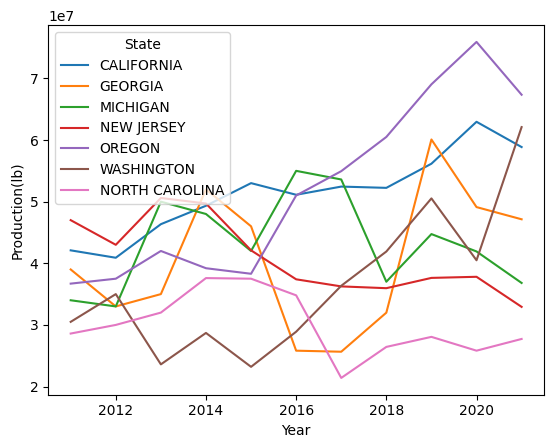

In [61]:
sns.lineplot(x='Year',y='Production(lb)',hue='State',data=prod1)

<AxesSubplot:xlabel='Year', ylabel='Production(lb)'>

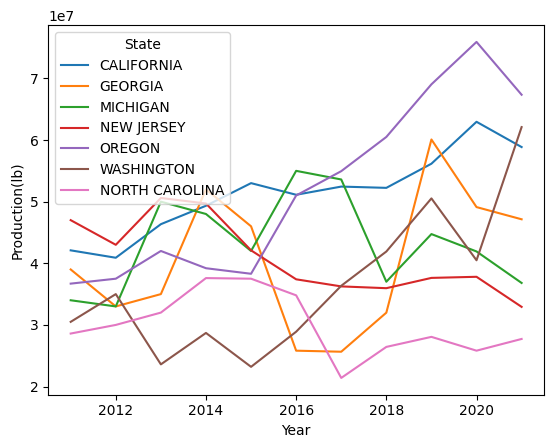

In [62]:
sns.lineplot(x='Year',y='Production(lb)',hue='State',data=prod1)

In [63]:
#adding production of all states in a year and their share
ser=prod1.groupby('Year')['Production(lb)'].sum()

<AxesSubplot:xlabel='Year', ylabel='Production(lb)'>

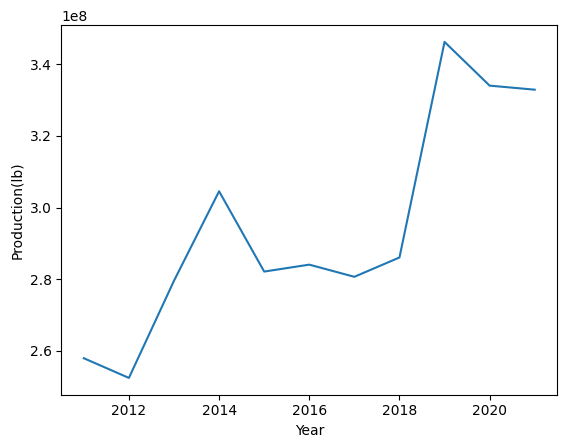

In [64]:
sns.lineplot(ser)

In [65]:
prod1=prod1[['Year','State','Production(lb)','$/lb_FM']]

In [66]:
prod1["Total"]=0

In [67]:
prod1.head()

,Year,State,Production(lb),$/lb_FM,Total
0,2021,CALIFORNIA,58860000.0,3.55,0
1,2021,GEORGIA,47140000.0,1.81,0
2,2021,MICHIGAN,36810000.0,1.45,0
3,2021,NEW JERSEY,32930000.0,2.19,0
4,2020,CALIFORNIA,62960000.0,3.35,0


In [3]:
ser

NameError: name 'ser' is not defined

In [69]:
prod1.iloc[1,0]

2021

In [70]:
prod1.shape

(77, 5)

In [71]:
#total for each year
for i in range(77):
    for j in range(11):
        if prod1.iloc[i,0]==ser.index[j]:
            prod1.iloc[i,4]=prod1.iloc[i,4]+ser.values[j]
    


In [72]:
prod1.tail()

,Year,State,Production(lb),$/lb_FM,Total
72,2011,MICHIGAN,34000000.0,2.15,257900000.0
73,2011,NEW JERSEY,47000000.0,1.60,257900000.0
74,2011,NORTH CAROLINA,28600000.0,2.00,257900000.0
75,2011,OREGON,36700000.0,1.99,257900000.0
76,2011,WASHINGTON,30500000.0,2.56,257900000.0


In [73]:
#percentage share
prod1['share']=prod1['Production(lb)']/prod1['Total']


In [74]:
#the domestic exports file

In [75]:
de=pd.read_csv('/Users/ajitkhanal/Downloads/MS AGECON/Research/data/Yearly/Exports/Domestic Exports.csv')

In [76]:
de.head()

,Commodity,Country,Domestic/Foreign,Time,Value ($US),Quantity 1,Quantity 2
0,"0810400029 Blueberries, Cultivtd (incl Highbus...",World Total,Domestic Exports,2011,"80,078,882","18,797,702",NaN
1,"0810400029 Blueberries, Cultivtd (incl Highbus...",World Total,Domestic Exports,2012,"99,594,549","17,556,370",NaN
2,"0810400029 Blueberries, Cultivtd (incl Highbus...",World Total,Domestic Exports,2013,"99,755,180","18,427,588",NaN
3,"0810400029 Blueberries, Cultivtd (incl Highbus...",World Total,Domestic Exports,2014,"87,719,979","16,102,547",NaN
4,"0810400029 Blueberries, Cultivtd (incl Highbus...",World Total,Domestic Exports,2015,"79,875,519","14,614,645",NaN


In [77]:
de.shape

(11, 7)

In [78]:
de['Quantity 1']=de['Quantity 1'].str.replace(',', '').astype(float)

In [79]:
de1=de.set_index('Time')

In [80]:
de1

,Commodity,Country,Domestic/Foreign,Value ($US),Quantity 1,Quantity 2
Time,,,,,,
2011,"0810400029 Blueberries, Cultivtd (incl Highbus...",World Total,Domestic Exports,"80,078,882",18797702.0,NaN
2012,"0810400029 Blueberries, Cultivtd (incl Highbus...",World Total,Domestic Exports,"99,594,549",17556370.0,NaN
2013,"0810400029 Blueberries, Cultivtd (incl Highbus...",World Total,Domestic Exports,"99,755,180",18427588.0,NaN
2014,"0810400029 Blueberries, Cultivtd (incl Highbus...",World Total,Domestic Exports,"87,719,979",16102547.0,NaN
2015,"0810400029 Blueberries, Cultivtd (incl Highbus...",World Total,Domestic Exports,"79,875,519",14614645.0,NaN
2016,"0810400029 Blueberries, Cultivtd (incl Highbus...",World Total,Domestic Exports,"77,779,899",15290151.0,NaN
2017,"0810400029 Blueberries, Cultivtd (incl Highbus...",World Total,Domestic Exports,"79,002,867",13686977.0,NaN
2018,"0810400029 Blueberries, Cultivtd (incl Highbus...",World Total,Domestic Exports,"83,655,546",16213481.0,NaN
2019,"0810400029 Blueberries, Cultivtd (incl Highbus...",World Total,Domestic Exports,"81,948,042",16136985.0,NaN


In [2]:
ser

NameError: name 'ser' is not defined

In [1]:
T_E=ser-de1['Quantity 1']*2.2046

NameError: name 'ser' is not defined

In [82]:
T_E

Year
2011    2.164586e+08
2012    2.136952e+08
2013    2.389217e+08
2014    2.690368e+08
2015    2.498880e+08
2016    2.503319e+08
2017    2.504720e+08
2018    2.502980e+08
2019    3.106764e+08
2020    2.920874e+08
2021    2.889120e+08
dtype: float64

In [83]:
prod1['T-E']=0

In [84]:
prod1

,Year,State,Production(lb),$/lb_FM,Total,share,T-E
0,2021,CALIFORNIA,58860000.0,3.55,3.329125e+08,0.176803,0
1,2021,GEORGIA,47140000.0,1.81,3.329125e+08,0.141599,0
2,2021,MICHIGAN,36810000.0,1.45,3.329125e+08,0.110570,0
3,2021,NEW JERSEY,32930000.0,2.19,3.329125e+08,0.098915,0
4,2020,CALIFORNIA,62960000.0,3.35,3.340411e+08,0.188480,0
...,...,...,...,...,...,...,...
72,2011,MICHIGAN,34000000.0,2.15,2.579000e+08,0.131834,0
73,2011,NEW JERSEY,47000000.0,1.60,2.579000e+08,0.182241,0
74,2011,NORTH CAROLINA,28600000.0,2.00,2.579000e+08,0.110896,0
75,2011,OREGON,36700000.0,1.99,2.579000e+08,0.142303,0


In [85]:
#production less exports broadcasting in the dataset

for n in range(77):
    for k in range(11):
        if prod1.iloc[n,0]==T_E.index[k]:
            prod1.iloc[n,6]=prod1.iloc[n,6]+T_E.values[k]

In [86]:
prod1.head()

,Year,State,Production(lb),$/lb_FM,Total,share,T-E
0,2021,CALIFORNIA,58860000.0,3.55,3.329125e+08,0.176803,2.889120e+08
1,2021,GEORGIA,47140000.0,1.81,3.329125e+08,0.141599,2.889120e+08
2,2021,MICHIGAN,36810000.0,1.45,3.329125e+08,0.110570,2.889120e+08
3,2021,NEW JERSEY,32930000.0,2.19,3.329125e+08,0.098915,2.889120e+08
4,2020,CALIFORNIA,62960000.0,3.35,3.340411e+08,0.188480,2.920874e+08


In [87]:
#redistributing the shares
prod1['T-E_states']=prod1['share']*prod1["T-E"]

In [88]:
prod1.head()


,Year,State,Production(lb),$/lb_FM,Total,share,T-E,T-E_states
0,2021,CALIFORNIA,58860000.0,3.55,3.329125e+08,0.176803,2.889120e+08,5.108057e+07
1,2021,GEORGIA,47140000.0,1.81,3.329125e+08,0.141599,2.889120e+08,4.090959e+07
2,2021,MICHIGAN,36810000.0,1.45,3.329125e+08,0.110570,2.889120e+08,3.194488e+07
3,2021,NEW JERSEY,32930000.0,2.19,3.329125e+08,0.098915,2.889120e+08,2.857770e+07
4,2020,CALIFORNIA,62960000.0,3.35,3.340411e+08,0.188480,2.920874e+08,5.505258e+07


In [89]:
prod1.head()

,Year,State,Production(lb),$/lb_FM,Total,share,T-E,T-E_states
0,2021,CALIFORNIA,58860000.0,3.55,3.329125e+08,0.176803,2.889120e+08,5.108057e+07
1,2021,GEORGIA,47140000.0,1.81,3.329125e+08,0.141599,2.889120e+08,4.090959e+07
2,2021,MICHIGAN,36810000.0,1.45,3.329125e+08,0.110570,2.889120e+08,3.194488e+07
3,2021,NEW JERSEY,32930000.0,2.19,3.329125e+08,0.098915,2.889120e+08,2.857770e+07
4,2020,CALIFORNIA,62960000.0,3.35,3.340411e+08,0.188480,2.920874e+08,5.505258e+07


In [90]:
#for tableau
prod1

,Year,State,Production(lb),$/lb_FM,Total,share,T-E,T-E_states
0,2021,CALIFORNIA,58860000.0,3.55,3.329125e+08,0.176803,2.889120e+08,5.108057e+07
1,2021,GEORGIA,47140000.0,1.81,3.329125e+08,0.141599,2.889120e+08,4.090959e+07
2,2021,MICHIGAN,36810000.0,1.45,3.329125e+08,0.110570,2.889120e+08,3.194488e+07
3,2021,NEW JERSEY,32930000.0,2.19,3.329125e+08,0.098915,2.889120e+08,2.857770e+07
4,2020,CALIFORNIA,62960000.0,3.35,3.340411e+08,0.188480,2.920874e+08,5.505258e+07
...,...,...,...,...,...,...,...,...
72,2011,MICHIGAN,34000000.0,2.15,2.579000e+08,0.131834,2.164586e+08,2.853661e+07
73,2011,NEW JERSEY,47000000.0,1.60,2.579000e+08,0.182241,2.164586e+08,3.944767e+07
74,2011,NORTH CAROLINA,28600000.0,2.00,2.579000e+08,0.110896,2.164586e+08,2.400433e+07
75,2011,OREGON,36700000.0,1.99,2.579000e+08,0.142303,2.164586e+08,3.080275e+07


In [91]:
prod1[['Total','Production(lb)','T-E']]

,Total,Production(lb),T-E
0,3.329125e+08,58860000.0,2.889120e+08
1,3.329125e+08,47140000.0,2.889120e+08
2,3.329125e+08,36810000.0,2.889120e+08
3,3.329125e+08,32930000.0,2.889120e+08
4,3.340411e+08,62960000.0,2.920874e+08
...,...,...,...
72,2.579000e+08,34000000.0,2.164586e+08
73,2.579000e+08,47000000.0,2.164586e+08
74,2.579000e+08,28600000.0,2.164586e+08
75,2.579000e+08,36700000.0,2.164586e+08


In [92]:
#tb_exp=prod1[['Total','Year','T-E']]

In [93]:
#tb_exp=tb_exp.drop_duplicates()

In [94]:
#tb_exp.to_csv('exports.csv')

In [95]:
prod2=prod1.copy()

In [96]:
prod2.head()

,Year,State,Production(lb),$/lb_FM,Total,share,T-E,T-E_states
0,2021,CALIFORNIA,58860000.0,3.55,3.329125e+08,0.176803,2.889120e+08,5.108057e+07
1,2021,GEORGIA,47140000.0,1.81,3.329125e+08,0.141599,2.889120e+08,4.090959e+07
2,2021,MICHIGAN,36810000.0,1.45,3.329125e+08,0.110570,2.889120e+08,3.194488e+07
3,2021,NEW JERSEY,32930000.0,2.19,3.329125e+08,0.098915,2.889120e+08,2.857770e+07
4,2020,CALIFORNIA,62960000.0,3.35,3.340411e+08,0.188480,2.920874e+08,5.505258e+07


In [97]:
# T-E is the yearly total of all states
#T-E_states is the yearly production less exports for individual states

In [98]:
prod3=prod2.set_index(['Year','State'])

In [99]:
prod2.State.value_counts()

CALIFORNIA        11
GEORGIA           11
MICHIGAN          11
NEW JERSEY        11
OREGON            11
WASHINGTON        11
NORTH CAROLINA    11
Name: State, dtype: int64

## Percentages:

Blueberry commission and growers association were contacted. They forwarded my message to someone in the organization who could answer these questions.

## Oregon:
Contacted **Weigh Wang** who works with the oregon blubeberry commission. According to him, harvesting of fresh blueberries happen  beginnning of June to end of September. The beggining and end months are periods of light harvesting and the middle months are periods of peak harvesting.

## Washington:

Through Washington Blueberry Comission, I came in contact with a grower **Bryan Sakuma**. Harvesting happen beginning of June to the end of September. June and September are light and the middle months are peak according to him.

## Michigan, New Jersey and North Carolina

**Bill Gruoenink** works with the Michigan Blueberry Growers Association. Apart from growers from Michigan, it has members from New Jersey, Georgia, and North Carolina.
1. For Michigan: 95% of harvest is during July and August, and some at the End of June
2. For New Jersey: Mid June (June 15th) to the 3rd week of July is the time of peak harvesting. Some in early august
3. NC: End of May (around 25th May) to first half of June (15 to 20th June)

## Georgia

**Ann Wildes** is owner and operator of The Blueberry Barn. She and her husband have been growing blueberries together in Georgia for the past 40 years. 
According to her,'Usually light picking in early April then it gets heavy in May and the first of June and then light middle June.'

## California
**California Blueberry Commission**: negligible in February and March (San Diego Area). Takes pace in April. Peak during last week of May and first week of June. Harvesting lasts till July.

## Allocating Percentages:

- WA and OR: 10% to June and 10% to September. 40% each to July and August
- MI: June:5%, July:50%,Aug:45%
- NJ: June:40%, July: 50%, Aug:10%
- NC: May:40%, June:60%
- GA: April:10%, May:50%,June:40
- CA: April:10%, May:40%,June:40%,July:10%




In [100]:
prod2

,Year,State,Production(lb),$/lb_FM,Total,share,T-E,T-E_states
0,2021,CALIFORNIA,58860000.0,3.55,3.329125e+08,0.176803,2.889120e+08,5.108057e+07
1,2021,GEORGIA,47140000.0,1.81,3.329125e+08,0.141599,2.889120e+08,4.090959e+07
2,2021,MICHIGAN,36810000.0,1.45,3.329125e+08,0.110570,2.889120e+08,3.194488e+07
3,2021,NEW JERSEY,32930000.0,2.19,3.329125e+08,0.098915,2.889120e+08,2.857770e+07
4,2020,CALIFORNIA,62960000.0,3.35,3.340411e+08,0.188480,2.920874e+08,5.505258e+07
...,...,...,...,...,...,...,...,...
72,2011,MICHIGAN,34000000.0,2.15,2.579000e+08,0.131834,2.164586e+08,2.853661e+07
73,2011,NEW JERSEY,47000000.0,1.60,2.579000e+08,0.182241,2.164586e+08,3.944767e+07
74,2011,NORTH CAROLINA,28600000.0,2.00,2.579000e+08,0.110896,2.164586e+08,2.400433e+07
75,2011,OREGON,36700000.0,1.99,2.579000e+08,0.142303,2.164586e+08,3.080275e+07


In [101]:


# Convert the 'Year' column to a datetime data type
prod2['Year'] = pd.to_datetime(prod2['Year'], format='%Y')

# Set the 'Year' and 'State' columns as the index of the dataframe
prod2.set_index(['Year', 'State'], inplace=True)

# Define a custom function to appropriate the production to specific months
def appropriate_production(row, month_percentages):
    # Get the state of the current row
    state = row.name[1]

    # Get the percentage and months to use for the current state
    percentages, months = month_percentages[state]

    # Calculate the total production for the year
    total_production = row['T-E_states']

    # Initialize a dictionary to store the monthly production values
    monthly_production = {}

    # Iterate through the months
    for month, percentage in zip(months, percentages):
        # Calculate the production for the current month based on the percentage
        production = total_production * percentage

        # Add the production for the current month to the dictionary
        monthly_production[month] = production

    # Return the dictionary of monthly production values
    return pd.Series(monthly_production)

# Define the month_percentages dictionary, which specifies the percentage and months to appropriate the production to for each state
month_percentages = {
    'WASHINGTON': ([0.1, 0.4, 0.4,0.1], ['Jun', 'Jul', 'Aug','Sep']),
    'OREGON': ([0.1, 0.4, 0.4,0.1], ['Jun', 'Jul', 'Aug','Sep']),
    'MICHIGAN': ([0.05, 0.5, 0.45], ['Jun', 'Jul', 'Aug']),
    'NEW JERSEY': ([0.4, 0.5, 0.1], ['Jun', 'Jul', 'Aug']),
    'NORTH CAROLINA': ([0.4,0.6], ['May','Jun']),
    'GEORGIA': ([0.1,0.5,0.4],['Apr','May',"Jun"]),
    'CALIFORNIA':([0.1,0.4,0.4,0.1],['Apr',"May",'Jun','Jul'])
    
}

# Use the apply method to apply the appropriate_production function to each row of the dataframe
df_monthly = prod2.apply(appropriate_production, axis=1, month_percentages=month_percentages)

# Print the resulting dataframe
print(df_monthly)


                                    Apr           Aug           Jul  \
Year       State                                                      
2021-01-01 CALIFORNIA      5.108057e+06           NaN  5.108057e+06   
           GEORGIA         4.090959e+06           NaN           NaN   
           MICHIGAN                 NaN  1.437520e+07  1.597244e+07   
           NEW JERSEY               NaN  2.857770e+06  1.428885e+07   
2020-01-01 CALIFORNIA      5.505258e+06           NaN  5.505258e+06   
...                                 ...           ...           ...   
2011-01-01 MICHIGAN                 NaN  1.284147e+07  1.426831e+07   
           NEW JERSEY               NaN  3.944767e+06  1.972383e+07   
           NORTH CAROLINA           NaN           NaN           NaN   
           OREGON                   NaN  1.232110e+07  1.232110e+07   
           WASHINGTON               NaN  1.023961e+07  1.023961e+07   

                                    Jun           May           Sep  
Year  

In [102]:
prod2[['T-E_states']].applymap('{:,.2f}'.format)

T-E_states
Year       State                        
2021-01-01 CALIFORNIA      51,080,572.37
           GEORGIA         40,909,585.15
           MICHIGAN        31,944,883.95
           NEW JERSEY      28,577,697.05
2020-01-01 CALIFORNIA      55,052,584.92
...                                  ...
2011-01-01 MICHIGAN        28,536,610.82
           NEW JERSEY      39,447,667.89
           NORTH CAROLINA  24,004,325.57
           OREGON          30,802,753.44
           WASHINGTON      25,599,018.53

[77 rows x 1 columns]

In [103]:
df_monthly[['Jun']].applymap('{:,.2f}'.format)

Jun
Year       State                        
2021-01-01 CALIFORNIA      20,432,228.95
           GEORGIA         16,363,834.06
           MICHIGAN         1,597,244.20
           NEW JERSEY      11,431,078.82
2020-01-01 CALIFORNIA      22,021,033.97
...                                  ...
2011-01-01 MICHIGAN         1,426,830.54
           NEW JERSEY      15,779,067.16
           NORTH CAROLINA  14,402,595.34
           OREGON           3,080,275.34
           WASHINGTON       2,559,901.85

[77 rows x 1 columns]

In [104]:
df_monthly

Apr           Aug           Jul  \
Year       State                                                      
2021-01-01 CALIFORNIA      5.108057e+06           NaN  5.108057e+06   
           GEORGIA         4.090959e+06           NaN           NaN   
           MICHIGAN                 NaN  1.437520e+07  1.597244e+07   
           NEW JERSEY               NaN  2.857770e+06  1.428885e+07   
2020-01-01 CALIFORNIA      5.505258e+06           NaN  5.505258e+06   
...                                 ...           ...           ...   
2011-01-01 MICHIGAN                 NaN  1.284147e+07  1.426831e+07   
           NEW JERSEY               NaN  3.944767e+06  1.972383e+07   
           NORTH CAROLINA           NaN           NaN           NaN   
           OREGON                   NaN  1.232110e+07  1.232110e+07   
           WASHINGTON               NaN  1.023961e+07  1.023961e+07   

                                    Jun           May           Sep  
Year       State                                                     
2021-01-01 CALIFORNIA      2.043223e+07  2.043223e+07           NaN  
           GEORGIA         1.636383e+07  2.045479e+07           NaN  
           MICHIGAN        1.597244e+06           NaN           NaN  
           NEW JERSEY      1.143108e+07           NaN           NaN  
2020-01-01 CALIFORNIA      2.202103e+07  2.202103e+07           NaN  
...                                 ...           ...           ...  
2011-01-01 MICHIGAN        1.426831e+06           NaN           NaN  
           NEW JERSEY      1.577907e+07           NaN           NaN  
           NORTH CAROLINA  1.440260e+07  9.601730e+06           NaN  
           OREGON          3.080275e+06           NaN  3.080275e+06  
           WASHINGTON      2.559902e+06           NaN  2.559902e+06  

[77 rows x 6 columns]

In [105]:

# Reset the index of the DataFrame to move the month and state columns from the index to the dataframe
df_monthly_reset = df_monthly.reset_index()


# Use the melt function to reshape the data so that the production values are in a single column
df_melted = pd.melt(df_monthly_reset, id_vars=['Year', 'State'], var_name='Month', value_name='Production')

# Print the resulting dataframe
print(df_melted)

          Year           State Month    Production
0   2021-01-01      CALIFORNIA   Apr  5.108057e+06
1   2021-01-01         GEORGIA   Apr  4.090959e+06
2   2021-01-01        MICHIGAN   Apr           NaN
3   2021-01-01      NEW JERSEY   Apr           NaN
4   2020-01-01      CALIFORNIA   Apr  5.505258e+06
..         ...             ...   ...           ...
457 2011-01-01        MICHIGAN   Sep           NaN
458 2011-01-01      NEW JERSEY   Sep           NaN
459 2011-01-01  NORTH CAROLINA   Sep           NaN
460 2011-01-01          OREGON   Sep  3.080275e+06
461 2011-01-01      WASHINGTON   Sep  2.559902e+06

[462 rows x 4 columns]


In [106]:
df_melted.dtypes

Year          datetime64[ns]
State                 object
Month                 object
Production           float64
dtype: object

In [107]:
df_melted.head()

,Year,State,Month,Production
0,2021-01-01,CALIFORNIA,Apr,5.108057e+06
1,2021-01-01,GEORGIA,Apr,4.090959e+06
2,2021-01-01,MICHIGAN,Apr,NaN
3,2021-01-01,NEW JERSEY,Apr,NaN
4,2020-01-01,CALIFORNIA,Apr,5.505258e+06


In [108]:
#change the year month format to something like Aug 2021
#from datetime import datetime



# Convert the 'Year' column to a datetime data type
df_melted['Year'] = pd.to_datetime(df_melted['Year'])

# Create a new 'Date' column by formatting the 'Year' and 'Month' columns as a string
df_melted['Date'] = df_melted['Year'].apply(lambda x: x.strftime('%b %Y'))

# Replace the month in the 'Date' column with the value from the 'Month' column
df_melted['Date'] = df_melted.apply(lambda x: x['Date'].replace('Jan', x['Month']), axis=1)

print(df_melted)





          Year           State Month    Production      Date
0   2021-01-01      CALIFORNIA   Apr  5.108057e+06  Apr 2021
1   2021-01-01         GEORGIA   Apr  4.090959e+06  Apr 2021
2   2021-01-01        MICHIGAN   Apr           NaN  Apr 2021
3   2021-01-01      NEW JERSEY   Apr           NaN  Apr 2021
4   2020-01-01      CALIFORNIA   Apr  5.505258e+06  Apr 2020
..         ...             ...   ...           ...       ...
457 2011-01-01        MICHIGAN   Sep           NaN  Sep 2011
458 2011-01-01      NEW JERSEY   Sep           NaN  Sep 2011
459 2011-01-01  NORTH CAROLINA   Sep           NaN  Sep 2011
460 2011-01-01          OREGON   Sep  3.080275e+06  Sep 2011
461 2011-01-01      WASHINGTON   Sep  2.559902e+06  Sep 2011

[462 rows x 5 columns]


In [109]:
#create a new dataframe and drop year and month column
m_prod=df_melted[['State','Production','Date']]

In [110]:
m_prod.head()

,State,Production,Date
0,CALIFORNIA,5.108057e+06,Apr 2021
1,GEORGIA,4.090959e+06,Apr 2021
2,MICHIGAN,NaN,Apr 2021
3,NEW JERSEY,NaN,Apr 2021
4,CALIFORNIA,5.505258e+06,Apr 2020


In [111]:
m_prod.Production.isnull().sum()

209

In [112]:
#shape
m_prod.shape

(462, 3)

In [113]:
# Drop rows with null values in the 'Production' column
m_prod1 = m_prod.dropna(subset=['Production'])

In [114]:
m_prod1.shape

(253, 3)

In [115]:
#we want to incorporate the $/lb_FM in this dataframe

In [116]:
prod2.dtypes


Production(lb)    float64
$/lb_FM           float64
Total             float64
share             float64
T-E               float64
T-E_states        float64
dtype: object

In [117]:
# Extract the year from the 'Date' column and store it in a new 'Year' column
# Extract the year from the 'Date' column and store it in a new 'Year' column
m_prod1['Year'] = m_prod1['Date'].apply(lambda x: int(x.split()[1]))

# Convert the 'Year' column to an integer data type
m_prod1['Year'] = m_prod1['Year'].astype(int)



In [118]:
# Merge the two dataframes on the 'Year' and 'State' columns
m_prod2 = m_prod1.merge(prod1, on=['Year', 'State'])

print(m_prod2)

              State    Production      Date  Year  Production(lb)  $/lb_FM  \
0        CALIFORNIA  5.108057e+06  Apr 2021  2021      58860000.0     3.55   
1        CALIFORNIA  5.108057e+06  Jul 2021  2021      58860000.0     3.55   
2        CALIFORNIA  2.043223e+07  Jun 2021  2021      58860000.0     3.55   
3        CALIFORNIA  2.043223e+07  May 2021  2021      58860000.0     3.55   
4           GEORGIA  4.090959e+06  Apr 2021  2021      47140000.0     1.81   
..              ...           ...       ...   ...             ...      ...   
248  NORTH CAROLINA  1.093983e+07  May 2013  2013      32000000.0     1.90   
249  NORTH CAROLINA  1.523975e+07  Jun 2012  2012      30000000.0     2.10   
250  NORTH CAROLINA  1.015984e+07  May 2012  2012      30000000.0     2.10   
251  NORTH CAROLINA  1.440260e+07  Jun 2011  2011      28600000.0     2.00   
252  NORTH CAROLINA  9.601730e+06  May 2011  2011      28600000.0     2.00   

            Total     share           T-E    T-E_states  
0    

In [119]:
m_prod2

,State,Production,Date,Year,Production(lb),$/lb_FM,Total,share,T-E,T-E_states
0,CALIFORNIA,5.108057e+06,Apr 2021,2021,58860000.0,3.55,3.329125e+08,0.176803,2.889120e+08,5.108057e+07
1,CALIFORNIA,5.108057e+06,Jul 2021,2021,58860000.0,3.55,3.329125e+08,0.176803,2.889120e+08,5.108057e+07
2,CALIFORNIA,2.043223e+07,Jun 2021,2021,58860000.0,3.55,3.329125e+08,0.176803,2.889120e+08,5.108057e+07
3,CALIFORNIA,2.043223e+07,May 2021,2021,58860000.0,3.55,3.329125e+08,0.176803,2.889120e+08,5.108057e+07
4,GEORGIA,4.090959e+06,Apr 2021,2021,47140000.0,1.81,3.329125e+08,0.141599,2.889120e+08,4.090959e+07
...,...,...,...,...,...,...,...,...,...,...
248,NORTH CAROLINA,1.093983e+07,May 2013,2013,32000000.0,1.90,2.795472e+08,0.114471,2.389217e+08,2.734957e+07
249,NORTH CAROLINA,1.523975e+07,Jun 2012,2012,30000000.0,2.10,2.524000e+08,0.118859,2.136952e+08,2.539959e+07
250,NORTH CAROLINA,1.015984e+07,May 2012,2012,30000000.0,2.10,2.524000e+08,0.118859,2.136952e+08,2.539959e+07
251,NORTH CAROLINA,1.440260e+07,Jun 2011,2011,28600000.0,2.00,2.579000e+08,0.110896,2.164586e+08,2.400433e+07


In [120]:
prod1.tail()

,Year,State,Production(lb),$/lb_FM,Total,share,T-E,T-E_states
72,2011,MICHIGAN,34000000.0,2.15,257900000.0,0.131834,2.164586e+08,2.853661e+07
73,2011,NEW JERSEY,47000000.0,1.60,257900000.0,0.182241,2.164586e+08,3.944767e+07
74,2011,NORTH CAROLINA,28600000.0,2.00,257900000.0,0.110896,2.164586e+08,2.400433e+07
75,2011,OREGON,36700000.0,1.99,257900000.0,0.142303,2.164586e+08,3.080275e+07
76,2011,WASHINGTON,30500000.0,2.56,257900000.0,0.118263,2.164586e+08,2.559902e+07


In [121]:
m_prod2.head()

,State,Production,Date,Year,Production(lb),$/lb_FM,Total,share,T-E,T-E_states
0,CALIFORNIA,5.108057e+06,Apr 2021,2021,58860000.0,3.55,332912495.9,0.176803,2.889120e+08,5.108057e+07
1,CALIFORNIA,5.108057e+06,Jul 2021,2021,58860000.0,3.55,332912495.9,0.176803,2.889120e+08,5.108057e+07
2,CALIFORNIA,2.043223e+07,Jun 2021,2021,58860000.0,3.55,332912495.9,0.176803,2.889120e+08,5.108057e+07
3,CALIFORNIA,2.043223e+07,May 2021,2021,58860000.0,3.55,332912495.9,0.176803,2.889120e+08,5.108057e+07
4,GEORGIA,4.090959e+06,Apr 2021,2021,47140000.0,1.81,332912495.9,0.141599,2.889120e+08,4.090959e+07


In [122]:
m_prod3=m_prod2.drop(columns={'Year','Production(lb)','Total','share','T-E','T-E_states'})

In [123]:
m_prod3

,State,Production,Date,$/lb_FM
0,CALIFORNIA,5.108057e+06,Apr 2021,3.55
1,CALIFORNIA,5.108057e+06,Jul 2021,3.55
2,CALIFORNIA,2.043223e+07,Jun 2021,3.55
3,CALIFORNIA,2.043223e+07,May 2021,3.55
4,GEORGIA,4.090959e+06,Apr 2021,1.81
...,...,...,...,...
248,NORTH CAROLINA,1.093983e+07,May 2013,1.90
249,NORTH CAROLINA,1.523975e+07,Jun 2012,2.10
250,NORTH CAROLINA,1.015984e+07,May 2012,2.10
251,NORTH CAROLINA,1.440260e+07,Jun 2011,2.00


In [124]:
#filter oregon and washington
oregon_washington = m_prod3.loc[(m_prod3['State'] == 'OREGON') | (m_prod3['State'] == 'WASHINGTON')]


In [125]:
oregon_washington

,State,Production,Date,$/lb_FM
83,OREGON,2.337939e+07,Aug 2021,1.58
84,OREGON,2.337939e+07,Jul 2021,1.58
85,OREGON,5.844846e+06,Jun 2021,1.58
86,OREGON,5.844846e+06,Sep 2021,1.58
87,WASHINGTON,2.155694e+07,Aug 2021,1.82
...,...,...,...,...
226,OREGON,3.080275e+06,Sep 2011,1.99
227,WASHINGTON,1.023961e+07,Aug 2011,2.56
228,WASHINGTON,1.023961e+07,Jul 2011,2.56
229,WASHINGTON,2.559902e+06,Jun 2011,2.56


In [126]:
# Group the data by month and sum the production values
production_by_month = oregon_washington.groupby('Date')['Production'].sum()

In [127]:
# Group the data by month and calculate the mean of the $/lb_FM values
avg_by_month = oregon_washington.groupby('Date')['$/lb_FM'].mean()

In [128]:
# Convert the groupby object to a dataframe and rename the column to "Production"
production_by_month = production_by_month.to_frame()
production_by_month.columns = ['Production']
# Convert the groupby object to a dataframe and rename the column to "$/lb_FM"
avg_by_month = avg_by_month.to_frame()
avg_by_month.columns = ['$/lb_FM']

In [129]:
production_by_month.head()

,Production
Date,
Aug 2011,2.256071e+07
Aug 2012,2.455294e+07
Aug 2013,2.242665e+07
Aug 2014,2.399397e+07
Aug 2015,2.179044e+07


In [130]:
avg_by_month.head()


,$/lb_FM
Date,
Aug 2011,2.275
Aug 2012,1.765
Aug 2013,1.370
Aug 2014,1.695
Aug 2015,1.650


In [131]:
#lets merge the two
# Merge the production and average dataframes using the "Date" column
combined_df = production_by_month.merge(avg_by_month, on='Date')

In [132]:
combined_df.head()

,Production,$/lb_FM
Date,,
Aug 2011,2.256071e+07,2.275
Aug 2012,2.455294e+07,1.765
Aug 2013,2.242665e+07,1.370
Aug 2014,2.399397e+07,1.695
Aug 2015,2.179044e+07,1.650


In [133]:
#reset index and create a state column
combined_df.reset_index(inplace=True)
combined_df['State']='OREGON AND WASHINGTON'

In [134]:
combined_df.head()

,Date,Production,$/lb_FM,State
0,Aug 2011,2.256071e+07,2.275,OREGON AND WASHINGTON
1,Aug 2012,2.455294e+07,1.765,OREGON AND WASHINGTON
2,Aug 2013,2.242665e+07,1.370,OREGON AND WASHINGTON
3,Aug 2014,2.399397e+07,1.695,OREGON AND WASHINGTON
4,Aug 2015,2.179044e+07,1.650,OREGON AND WASHINGTON


In [135]:
#lets remove the rows that contained oregon or washington in the original dataframe and stack combined_df
#underneath it
filtered_df = m_prod3.loc[~((m_prod3['State'] == 'OREGON') | (m_prod3['State'] == 'WASHINGTON'))]
#concat
result_df = pd.concat([filtered_df, combined_df], axis=0)


In [136]:
result_df

,State,Production,Date,$/lb_FM
0,CALIFORNIA,5.108057e+06,Apr 2021,3.550
1,CALIFORNIA,5.108057e+06,Jul 2021,3.550
2,CALIFORNIA,2.043223e+07,Jun 2021,3.550
3,CALIFORNIA,2.043223e+07,May 2021,3.550
4,GEORGIA,4.090959e+06,Apr 2021,1.810
...,...,...,...,...
39,OREGON AND WASHINGTON,8.148368e+06,Sep 2017,1.780
40,OREGON AND WASHINGTON,8.961270e+06,Sep 2018,1.945
41,OREGON AND WASHINGTON,1.072848e+07,Sep 2019,1.520
42,OREGON AND WASHINGTON,1.017896e+07,Sep 2020,1.715


In [137]:
result_df[result_df['State']=='OREGON AND WASHINGTON'].head()

,State,Production,Date,$/lb_FM
0,OREGON AND WASHINGTON,2.256071e+07,Aug 2011,2.275
1,OREGON AND WASHINGTON,2.455294e+07,Aug 2012,1.765
2,OREGON AND WASHINGTON,2.242665e+07,Aug 2013,1.370
3,OREGON AND WASHINGTON,2.399397e+07,Aug 2014,1.695
4,OREGON AND WASHINGTON,2.179044e+07,Aug 2015,1.650


In [138]:
#rename Date to month
result_df.rename(columns={'Date':'Month'},inplace=True)

In [139]:
result_df.State.value_counts()

CALIFORNIA               44
OREGON AND WASHINGTON    44
GEORGIA                  33
MICHIGAN                 33
NEW JERSEY               33
NORTH CAROLINA           22
Name: State, dtype: int64

In [140]:
#result_df.to_csv('for_market_share_D.csv')

In [141]:
#if no further change on distributing the production is necessary, use excel to do further calculations like
#aggregating months, getting total value

## Terminal Market and Shipping point market data
- First we find out the months whose data are unavialbale 
- then only we will predict the data

## Check the share of Canada, Mexico, Peru and Chile in total US imports of fresh Blueberries
## Analysis in the excel sheet : C+M+P+C/ world total

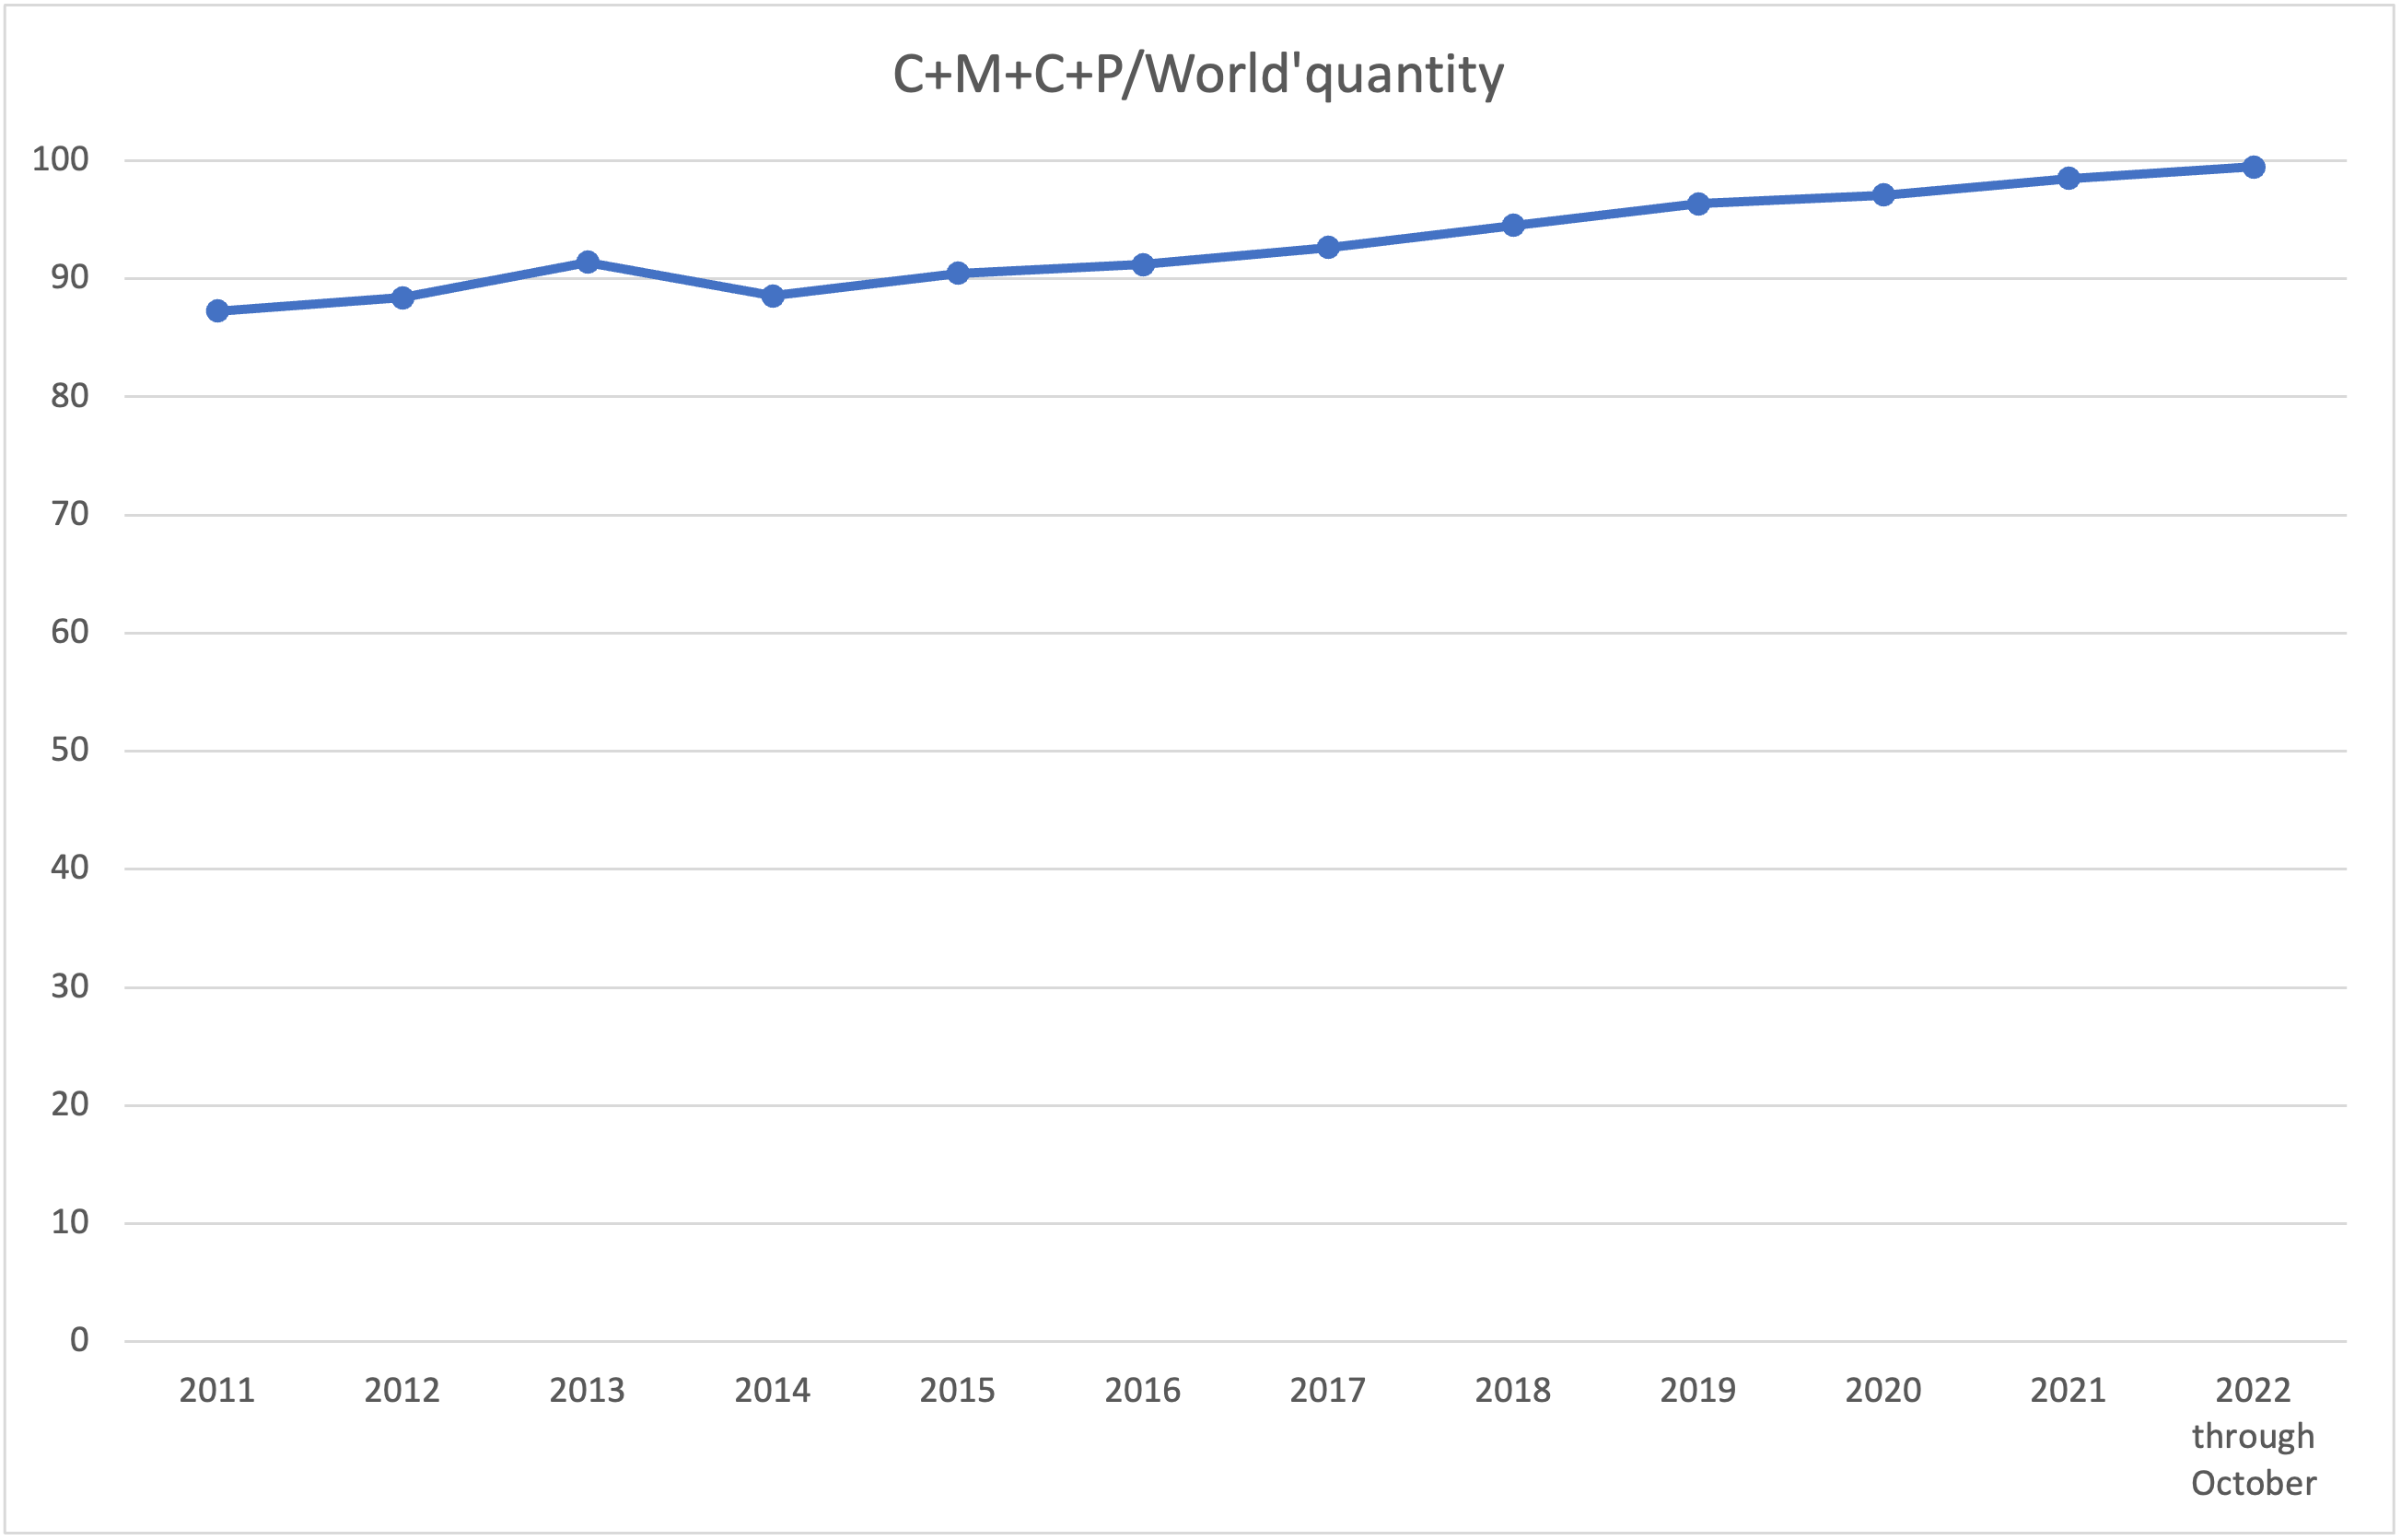

## Data merging for domestic states

## Terminal and Shipping Point

In this section we download the monthly average shipping point and terminal market data for the states under consideration- Michigan, Georgia, New Jersey, Oregon and Washington, California, and North Carolina from 
[USDA AMS](https://cat.ams.usda.gov/app/main#/dashboards/58d7ca1a733656a41a000029?embed=true&l=false&r=false&h=false&t=false&volatile=true)

The two main packages for fresh blueberries are Flats 12 1-pt cups with lids and Flats 12 6-oz cups with lids
We use the conversion factor and convert them to weights:

- Flats 12-1 pint cups- 11 pounds; 
- Flats 12 6 ounce cups- Five pounds;

Then we take the averages for each month regardless of the packaging




In [142]:
#terminal and shipping point

In [143]:
#first shipping point
#the data set for shipping point contains information for the seven states we are interested in

In [144]:
sp_states=pd.read_csv("/Users/ajitkhanal/Downloads/MS AGECON/Research/data/Monthly/SP_Dstates_since_2011.csv")

In [145]:
sp_states.head()

,Commodity,Date,District,Variety,Sub-Variety,Package,Unit of Sale,Item Size,Env,Grade,Product Type,Avg Price
0,BLUEBERRIES,09/2015,MICHIGAN,Not Specified,Not Specified,flats 12 6-oz cups with lids,NONE,MED-LGE,Not Specified,NONE,Non-Organic,30.000
1,BLUEBERRIES,07/2013,MICHIGAN,Not Specified,Not Specified,flats 12 1-pt cups with lids,NONE,MED-LGE,Not Specified,NONE,Non-Organic,12.250
2,BLUEBERRIES,07/2011,MICHIGAN,Not Specified,Not Specified,flats 12 1-pt cups with lids,NONE,LGE,Not Specified,NONE,Non-Organic,18.500
3,BLUEBERRIES,05/2011,SOUTH GEORGIA,Not Specified,Not Specified,flats 12 1-pt cups with lids,NONE,LGE,Not Specified,NONE,Non-Organic,21.425
4,BLUEBERRIES,05/2011,SOUTH GEORGIA,Not Specified,Not Specified,flats 12 1-pt cups with lids,NONE,LGE,Not Specified,NONE,Non-Organic,21.000


In [146]:
#checking for duplicates

In [147]:
sp_states.duplicated().value_counts()

True     2789
False    1529
dtype: int64

In [148]:
#removing duplicates

In [149]:
sp_states1=sp_states.drop_duplicates()

In [150]:
#use conversion factor to get $/lb


In [151]:
sp_states1.Package.value_counts()

flats 12 1-pt cups with lids    1003
flats 12 6-oz cups with lids     526
Name: Package, dtype: int64

In [152]:
#we separate the data set for each package convert to $/lb and join again
sp_states2= sp_states1[sp_states1["Package"]=='flats 12 6-oz cups with lids']
sp_states3=sp_states1[sp_states1["Package"]!='flats 12 6-oz cups with lids']

In [153]:
sp_states2['$/lb_SP']=sp_states2['Avg Price'].apply(lambda x:x/5)
sp_states3['$/lb_SP']=sp_states3['Avg Price'].apply(lambda x:x/11)


In [154]:
#concatinating (stacking) one dataframe below other
sp_states4=pd.concat([sp_states2,sp_states3])

In [155]:
sp_states4.tail()

,Commodity,Date,District,Variety,Sub-Variety,Package,Unit of Sale,Item Size,Env,Grade,Product Type,Avg Price,$/lb_SP
4241,BLUEBERRIES,08/2022,OREGON AND WASHINGTON,Not Specified,Not Specified,flats 12 1-pt cups with lids,NONE,MED-LGE,Not Specified,NONE,Non-Organic,17.25,1.568182
4247,BLUEBERRIES,07/2022,OREGON AND WASHINGTON,Not Specified,Not Specified,flats 12 1-pt cups with lids,NONE,MED-LGE,Not Specified,NONE,Non-Organic,28.50,2.590909
4249,BLUEBERRIES,07/2022,MICHIGAN,Not Specified,Not Specified,flats 12 1-pt cups with lids,NONE,LGE,Not Specified,NONE,Non-Organic,27.00,2.454545
4268,BLUEBERRIES,08/2022,OREGON AND WASHINGTON,Not Specified,Not Specified,flats 12 1-pt cups with lids,NONE,MED-LGE,Not Specified,NONE,Non-Organic,15.75,1.431818
4286,BLUEBERRIES,09/2022,OREGON AND WASHINGTON,Not Specified,Not Specified,flats 12 1-pt cups with lids,NONE,MED-LGE,Not Specified,NONE,Non-Organic,19.25,1.750000


In [156]:
#now we extract data for individual states and calculatet the average monthly price for each state

In [157]:


# convert the 'date' column to datetime format
sp_states4['Date'] = pd.to_datetime(sp_states4['Date'], format='%m/%Y')

# change the date format to 'Sep 2011' using the apply method
sp_states4['Date'] = sp_states4['Date'].apply(lambda x: x.strftime('%b %Y'))


In [158]:
sp_states4.tail(3)

,Commodity,Date,District,Variety,Sub-Variety,Package,Unit of Sale,Item Size,Env,Grade,Product Type,Avg Price,$/lb_SP
4249,BLUEBERRIES,Jul 2022,MICHIGAN,Not Specified,Not Specified,flats 12 1-pt cups with lids,NONE,LGE,Not Specified,NONE,Non-Organic,27.00,2.454545
4268,BLUEBERRIES,Aug 2022,OREGON AND WASHINGTON,Not Specified,Not Specified,flats 12 1-pt cups with lids,NONE,MED-LGE,Not Specified,NONE,Non-Organic,15.75,1.431818
4286,BLUEBERRIES,Sep 2022,OREGON AND WASHINGTON,Not Specified,Not Specified,flats 12 1-pt cups with lids,NONE,MED-LGE,Not Specified,NONE,Non-Organic,19.25,1.750000


In [159]:
sp_states4['District'].value_counts()

OREGON AND WASHINGTON                                 448
SOUTH GEORGIA                                         276
MICHIGAN                                              264
SOUTH & CENTRAL DISTRICT CALIFORNIA                   208
EASTERN NORTH CAROLINA                                185
SOUTH NEW JERSEY                                      123
CENTRAL AND SOUTHERN SAN JOAQUIN VALLEY CALIFORNIA     25
Name: District, dtype: int64

In [160]:
sp_states4.columns

Index(['Commodity', 'Date', 'District', 'Variety', 'Sub-Variety', 'Package',
       'Unit of Sale', 'Item Size', 'Env', 'Grade', 'Product Type',
       'Avg Price', '$/lb_SP'],
      dtype='object')

In [161]:
sp_states4['Package'].value_counts()

flats 12 1-pt cups with lids    1003
flats 12 6-oz cups with lids     526
Name: Package, dtype: int64

In [162]:
sp_states5=sp_states4[['Date','District',"$/lb_SP"]]

In [163]:
sp_states5.head()

,Date,District,$/lb_SP
0,Sep 2015,MICHIGAN,6.000
28,May 2011,SOUTH GEORGIA,2.585
30,May 2011,SOUTH GEORGIA,2.400
32,May 2011,SOUTH GEORGIA,2.650
41,Sep 2012,MICHIGAN,4.550


In [164]:
#two origin districts for california
#replace those occurances with CALIFORNIA

In [165]:
# Replace the name of certain countries
sp_states5['District'] = sp_states5['District'].replace({'CENTRAL AND SOUTHERN SAN JOAQUIN VALLEY CALIFORNIA': 
                                                         'CALIFORNIA', 
                                                         'SOUTH & CENTRAL DISTRICT CALIFORNIA': 'CALIFORNIA'})

In [166]:
sp_states5['District'].value_counts()

OREGON AND WASHINGTON     448
SOUTH GEORGIA             276
MICHIGAN                  264
CALIFORNIA                233
EASTERN NORTH CAROLINA    185
SOUTH NEW JERSEY          123
Name: District, dtype: int64

In [167]:
#now we calculate the mean for each month for each state
# Group the data by location and month, and calculate the average price for each group
df_sp = sp_states5.groupby(['District', 'Date'])['$/lb_SP'].mean()

# Reset the index so that location and month become columns in the resulting DataFrame
df_sp = df_sp.reset_index()

# Rename the columns as desired
df_sp = df_sp.rename(columns={'District': 'State', 'Date': 'Month'})

In [168]:
df_sp.tail(5)

,State,Month,$/lb_SP
205,SOUTH NEW JERSEY,Jun 2018,1.696970
206,SOUTH NEW JERSEY,Jun 2019,1.586364
207,SOUTH NEW JERSEY,Jun 2020,2.090909
208,SOUTH NEW JERSEY,Jun 2021,1.628788
209,SOUTH NEW JERSEY,Jun 2022,2.418182


In [169]:
#to create a panel data we need to match the states names 
# Replace the state names
df_sp['State'] = df_sp['State'].replace({'SOUTH GEORGIA': 'GEORGIA', 'EASTERN NORTH CAROLINA': 'NORTH CAROLINA', 'SOUTH NEW JERSEY': 'NEW JERSEY'})


In [170]:
df_sp.tail()

,State,Month,$/lb_SP
205,NEW JERSEY,Jun 2018,1.696970
206,NEW JERSEY,Jun 2019,1.586364
207,NEW JERSEY,Jun 2020,2.090909
208,NEW JERSEY,Jun 2021,1.628788
209,NEW JERSEY,Jun 2022,2.418182


## TERMINAL MARKET

In [171]:
tm=pd.read_csv("/Users/ajitkhanal/Downloads/MS AGECON/Research/data/Monthly/TM_Dstates_since_2011.csv")

In [172]:
tm.head()

,Commodity,Month,Market,Origin,Variety,Sub-Variety,Package,Item Size,Unit of Sale,Env,Grade,Product Type,Avg Price
0,BLUEBERRIES,Jun 2016,DETROIT,NEW JERSEY,Not Specified,Not Specified,flats 12 1-pt cups with lids,MED-LGE,NONE,Not Specified,NONE,Non-Organic,16.25
1,BLUEBERRIES,Jun 2016,DETROIT,CALIFORNIA,Not Specified,Not Specified,flats 12 1-pt cups with lids,MED-LGE,NONE,Not Specified,NONE,Non-Organic,18.00
2,BLUEBERRIES,Jun 2016,DETROIT,GEORGIA,Not Specified,Not Specified,flats 12 1-pt cups with lids,MED-LGE,NONE,Not Specified,NONE,Non-Organic,16.25
3,BLUEBERRIES,Jun 2016,MIAMI,GEORGIA,Not Specified,Not Specified,flats 12 6-oz cups with lids,MED,NONE,Not Specified,NONE,Non-Organic,21.50
4,BLUEBERRIES,Jun 2016,DALLAS,CALIFORNIA,Not Specified,Not Specified,flats 12 1-pt cups with lids,MED,NONE,Not Specified,NONE,Non-Organic,27.00


In [173]:
tm.rename(columns={'Origin':'State'},inplace=True)

In [174]:
tm.State.value_counts()

CALIFORNIA        7188
MICHIGAN          4889
GEORGIA           4442
OREGON            3831
NEW JERSEY        3251
NORTH CAROLINA    2951
WASHINGTON        1395
Name: State, dtype: int64

In [175]:
#checking for duplicates
tm.duplicated().value_counts()

True     17502
False    10445
dtype: int64

In [176]:
#dropping duplicates
tm1=tm.drop_duplicates()

In [177]:
#selecting necessary columns
tm2=tm1[['Month','State','Package','Avg Price']]

In [178]:
tm3= tm2[tm2["Package"]=='flats 12 6-oz cups with lids']
tm4=tm2[tm2["Package"]!='flats 12 6-oz cups with lids']


In [179]:
tm3['$/lb_TM']=tm3['Avg Price'].apply(lambda x:x/5)
tm4['$/lb_TM']=tm4['Avg Price'].apply(lambda x:x/11)

In [180]:
#concatinating (stacking) one dataframe below other
tm5=pd.concat([tm3,tm4])

In [181]:
#to merge and make a panal data with info on shipping point and terminal market and domestic production
#we treat washigton and oregon as a single unit
#they have same harvesting period
#shipping point treats oregon and washington as a single unit rather than separately
tm5['State']=tm5['State'].replace({'OREGON':'OREGON AND WASHINGTON','WASHINGTON':'OREGON AND WASHINGTON'})

In [182]:
#now we group by month and state and calculate the average price for each state
#regardless of the location that it is sold in

In [183]:
tm5['$/lb_TM'].isnull().any()

False

In [184]:
tm5.State.value_counts()

CALIFORNIA               2475
OREGON AND WASHINGTON    1876
MICHIGAN                 1821
GEORGIA                  1781
NEW JERSEY               1323
NORTH CAROLINA           1169
Name: State, dtype: int64

In [185]:
tm5.head()

,Month,State,Package,Avg Price,$/lb_TM
3,Jun 2016,GEORGIA,flats 12 6-oz cups with lids,21.5,4.3
5,Jun 2016,CALIFORNIA,flats 12 6-oz cups with lids,16.0,3.2
7,Jun 2016,GEORGIA,flats 12 6-oz cups with lids,18.0,3.6
24,Aug 2016,OREGON AND WASHINGTON,flats 12 6-oz cups with lids,21.5,4.3
32,Aug 2016,CALIFORNIA,flats 12 6-oz cups with lids,16.0,3.2


In [186]:
# Group the data by location and month, and calculate the average price for each group
tm6=tm5.groupby(['State','Month'])['$/lb_TM'].mean()

In [187]:
tm6.head()

State       Month   
CALIFORNIA  Apr 2011    7.000000
            Apr 2012    6.174074
            Apr 2013    6.939655
            Apr 2014    7.622521
            Apr 2015    5.224560
Name: $/lb_TM, dtype: float64

In [188]:
# Reset the index so that location and month become columns in the resulting DataFrame
tm7=tm6.reset_index()

In [189]:
tm7

,State,Month,$/lb_TM
0,CALIFORNIA,Apr 2011,7.000000
1,CALIFORNIA,Apr 2012,6.174074
2,CALIFORNIA,Apr 2013,6.939655
3,CALIFORNIA,Apr 2014,7.622521
4,CALIFORNIA,Apr 2015,5.224560
...,...,...,...
386,OREGON AND WASHINGTON,Sep 2018,4.218273
387,OREGON AND WASHINGTON,Sep 2019,2.633333
388,OREGON AND WASHINGTON,Sep 2020,3.788843
389,OREGON AND WASHINGTON,Sep 2021,5.167273


In [190]:
#panel data
final_df = pd.merge(tm7, df_sp, on=['State', 'Month'], how='outer')
final_df = pd.merge(final_df, result_df, on=['State', 'Month'], how='outer')


In [191]:
final_df

,State,Month,$/lb_TM,$/lb_SP,Production,$/lb_FM
0,CALIFORNIA,Apr 2011,7.000000,NaN,3.533504e+06,2.41
1,CALIFORNIA,Apr 2012,6.174074,4.556667,3.462811e+06,3.27
2,CALIFORNIA,Apr 2013,6.939655,5.200000,3.961171e+06,2.99
3,CALIFORNIA,Apr 2014,7.622521,6.033333,4.358530e+06,2.58
4,CALIFORNIA,Apr 2015,5.224560,3.088636,4.695349e+06,2.23
...,...,...,...,...,...,...
393,MICHIGAN,Jun 2018,NaN,NaN,1.619259e+06,1.38
394,MICHIGAN,Jun 2016,NaN,NaN,2.423642e+06,1.72
395,MICHIGAN,Jun 2015,NaN,NaN,1.860159e+06,1.80
396,MICHIGAN,Jun 2014,NaN,NaN,2.120233e+06,1.90


In [192]:
final_df.to_csv('Panel_States')

In [193]:
tm7

,State,Month,$/lb_TM
0,CALIFORNIA,Apr 2011,7.000000
1,CALIFORNIA,Apr 2012,6.174074
2,CALIFORNIA,Apr 2013,6.939655
3,CALIFORNIA,Apr 2014,7.622521
4,CALIFORNIA,Apr 2015,5.224560
...,...,...,...
386,OREGON AND WASHINGTON,Sep 2018,4.218273
387,OREGON AND WASHINGTON,Sep 2019,2.633333
388,OREGON AND WASHINGTON,Sep 2020,3.788843
389,OREGON AND WASHINGTON,Sep 2021,5.167273


In [194]:
result_df[result_df.State=='CALIFORNIA'].sort_values(by='Month').head()

,State,Production,Month,$/lb_FM
70,CALIFORNIA,3.533504e+06,Apr 2011,2.41
63,CALIFORNIA,3.462811e+06,Apr 2012,3.27
44,CALIFORNIA,3.961171e+06,Apr 2013,2.99
40,CALIFORNIA,4.358530e+06,Apr 2014,2.58
33,CALIFORNIA,4.695349e+06,Apr 2015,2.23


In [195]:
final_df.head()

,State,Month,$/lb_TM,$/lb_SP,Production,$/lb_FM
0,CALIFORNIA,Apr 2011,7.000000,NaN,3.533504e+06,2.41
1,CALIFORNIA,Apr 2012,6.174074,4.556667,3.462811e+06,3.27
2,CALIFORNIA,Apr 2013,6.939655,5.200000,3.961171e+06,2.99
3,CALIFORNIA,Apr 2014,7.622521,6.033333,4.358530e+06,2.58
4,CALIFORNIA,Apr 2015,5.224560,3.088636,4.695349e+06,2.23


# NULL VALUES

In [196]:
#find the number of rows that have data in the "Production" column 
#and null values in the "$/lb_TM" column
num_rows = final_df[(final_df['Production'].notnull()) & (final_df['$/lb_TM'].isnull())].shape[0]
num_rows


7

In [197]:
final_df.loc[(final_df['Production'].notnull()) & (final_df['$/lb_TM'].isnull())]


,State,Month,$/lb_TM,$/lb_SP,Production,$/lb_FM
391,MICHIGAN,Jun 2021,NaN,NaN,1.597244e+06,1.45
392,MICHIGAN,Jun 2019,NaN,NaN,2.007160e+06,1.35
393,MICHIGAN,Jun 2018,NaN,NaN,1.619259e+06,1.38
394,MICHIGAN,Jun 2016,NaN,NaN,2.423642e+06,1.72
395,MICHIGAN,Jun 2015,NaN,NaN,1.860159e+06,1.80
396,MICHIGAN,Jun 2014,NaN,NaN,2.120233e+06,1.90
397,MICHIGAN,Jun 2011,NaN,NaN,1.426831e+06,2.15


In [198]:
final_df.shape

(398, 6)

In [199]:
#total null values regardless of production
final_df['$/lb_TM'].isnull().sum()

7

In [200]:
final_df[final_df['$/lb_TM'].isnull()].shape

(7, 6)

In [201]:
final_df.shape

(398, 6)

In [202]:
7/398

0.017587939698492462

In [203]:
final_df[final_df['State']=='MICHIGAN']

,State,Month,$/lb_TM,$/lb_SP,Production,$/lb_FM
176,MICHIGAN,Apr 2021,4.090909,NaN,NaN,NaN
177,MICHIGAN,Aug 2011,2.461610,2.039669,1.284147e+07,2.15
178,MICHIGAN,Aug 2012,2.539001,2.572314,1.257280e+07,2.00
179,MICHIGAN,Aug 2013,2.168790,1.893939,1.923017e+07,1.70
180,MICHIGAN,Aug 2014,2.619839,2.178671,1.908210e+07,1.90
...,...,...,...,...,...,...
393,MICHIGAN,Jun 2018,NaN,NaN,1.619259e+06,1.38
394,MICHIGAN,Jun 2016,NaN,NaN,2.423642e+06,1.72
395,MICHIGAN,Jun 2015,NaN,NaN,1.860159e+06,1.80
396,MICHIGAN,Jun 2014,NaN,NaN,2.120233e+06,1.90


In [204]:
tm7[tm7.State=='MICHIGAN']

,State,Month,$/lb_TM
176,MICHIGAN,Apr 2021,4.090909
177,MICHIGAN,Aug 2011,2.461610
178,MICHIGAN,Aug 2012,2.539001
179,MICHIGAN,Aug 2013,2.168790
180,MICHIGAN,Aug 2014,2.619839
181,MICHIGAN,Aug 2015,2.804974
182,MICHIGAN,Aug 2016,2.481646
183,MICHIGAN,Aug 2017,2.142769
184,MICHIGAN,Aug 2018,2.049799
185,MICHIGAN,Aug 2019,1.875344


In [205]:
#to use interpolation i need data for May and July but i dont have data for May
#so interpolation cannot be used

In [206]:
final_df.columns

Index(['State', 'Month', '$/lb_TM', '$/lb_SP', 'Production', '$/lb_FM'], dtype='object')

In [207]:
final_df.State.value_counts()

CALIFORNIA               123
OREGON AND WASHINGTON     64
MICHIGAN                  63
NORTH CAROLINA            56
GEORGIA                   53
NEW JERSEY                39
Name: State, dtype: int64

In [208]:
final_df.head(
)

,State,Month,$/lb_TM,$/lb_SP,Production,$/lb_FM
0,CALIFORNIA,Apr 2011,7.000000,NaN,3.533504e+06,2.41
1,CALIFORNIA,Apr 2012,6.174074,4.556667,3.462811e+06,3.27
2,CALIFORNIA,Apr 2013,6.939655,5.200000,3.961171e+06,2.99
3,CALIFORNIA,Apr 2014,7.622521,6.033333,4.358530e+06,2.58
4,CALIFORNIA,Apr 2015,5.224560,3.088636,4.695349e+06,2.23


In [209]:
final_df.State.value_counts()

CALIFORNIA               123
OREGON AND WASHINGTON     64
MICHIGAN                  63
NORTH CAROLINA            56
GEORGIA                   53
NEW JERSEY                39
Name: State, dtype: int64

In [210]:
final_df.columns

Index(['State', 'Month', '$/lb_TM', '$/lb_SP', 'Production', '$/lb_FM'], dtype='object')

## Missing Values

In [211]:
#lets check for multiple imputation
#its not wrong to say that the missing values are MAR (missing at random) or MCAR(Missing completely at random)
#this is because the missing values are not related to any observed or unobserved variables
#missing values are completely random and are not influenced by anything in the dataset


In [212]:
#another assumption for using multiple imputation is that the data follows normal distribution
#lets check for that

In [213]:
#drop the null values for $/lb_TM as we are going to use this to fit a model
#create a new dataframe by dropping null values for the terminal market column
fin_df=final_df.dropna(subset="$/lb_TM")

In [214]:
#D'Agostino-Pearson test
from scipy import stats
  # Replace this with your data

k2, p = stats.normaltest(fin_df['$/lb_TM'])

print(p)

if p < 0.05:
    print("The data is not normally distributed")
else:
    print("The data is normally distributed")

1.3118341100845802e-10
The data is not normally distributed


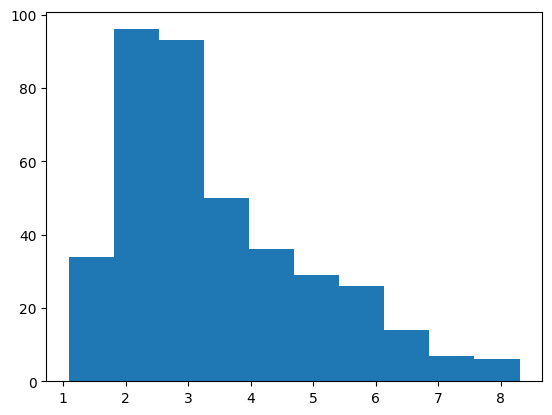

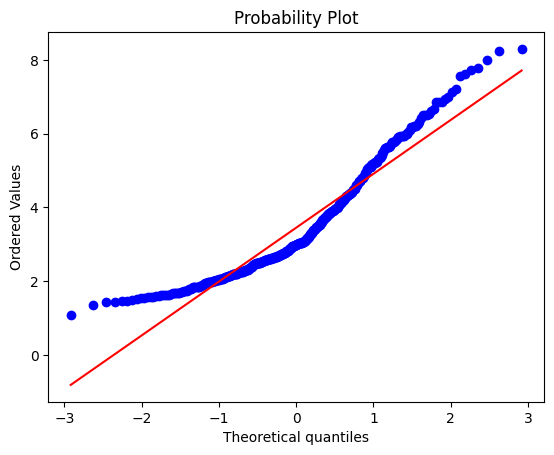

In [215]:
import matplotlib.pyplot as plt
import numpy as np
# Create the histogram
plt.hist(fin_df['$/lb_TM'])
plt.show()

# Create the Q-Q plot
stats.probplot(fin_df['$/lb_TM'], dist="norm", plot=plt)
plt.show()

In [216]:
#the plot shows that the data is skewed 
#the q-q plot shows that the data is not normal


In [217]:
#one way to go around the assumption of normal distribution is when the sample size is large
#but only 398 observations with missing values counting may not suffice


In [218]:
final_df.head()

,State,Month,$/lb_TM,$/lb_SP,Production,$/lb_FM
0,CALIFORNIA,Apr 2011,7.000000,NaN,3.533504e+06,2.41
1,CALIFORNIA,Apr 2012,6.174074,4.556667,3.462811e+06,3.27
2,CALIFORNIA,Apr 2013,6.939655,5.200000,3.961171e+06,2.99
3,CALIFORNIA,Apr 2014,7.622521,6.033333,4.358530e+06,2.58
4,CALIFORNIA,Apr 2015,5.224560,3.088636,4.695349e+06,2.23


In [219]:
final_df.State.value_counts()

CALIFORNIA               123
OREGON AND WASHINGTON     64
MICHIGAN                  63
NORTH CAROLINA            56
GEORGIA                   53
NEW JERSEY                39
Name: State, dtype: int64

In [220]:
#this is for filling the null values
final_df1=final_df.copy()

In [221]:
# Convert the Month column to a date type
#final_df1['Month'] = pd.to_datetime(final_df1['Month'], format='%b %Y')

In [222]:
#final_df1['Month']=final_df1['Month'].dt.month
#final_df1=pd.get_dummies(final_df1, columns=['Month', 'State'])

In [223]:
final_df1.head()

,State,Month,$/lb_TM,$/lb_SP,Production,$/lb_FM
0,CALIFORNIA,Apr 2011,7.000000,NaN,3.533504e+06,2.41
1,CALIFORNIA,Apr 2012,6.174074,4.556667,3.462811e+06,3.27
2,CALIFORNIA,Apr 2013,6.939655,5.200000,3.961171e+06,2.99
3,CALIFORNIA,Apr 2014,7.622521,6.033333,4.358530e+06,2.58
4,CALIFORNIA,Apr 2015,5.224560,3.088636,4.695349e+06,2.23


In [224]:
final_df1['Production'].isnull().sum()

189

In [225]:
#we dont need those months where production did not happen
final_df1=final_df1.dropna(subset='Production')

In [226]:
final_df1[final_df1.State=='MICHIGAN']


,State,Month,$/lb_TM,$/lb_SP,Production,$/lb_FM
177,MICHIGAN,Aug 2011,2.461610,2.039669,1.284147e+07,2.15
178,MICHIGAN,Aug 2012,2.539001,2.572314,1.257280e+07,2.00
179,MICHIGAN,Aug 2013,2.168790,1.893939,1.923017e+07,1.70
180,MICHIGAN,Aug 2014,2.619839,2.178671,1.908210e+07,1.90
181,MICHIGAN,Aug 2015,2.804974,2.700000,1.674143e+07,1.80
182,MICHIGAN,Aug 2016,2.481646,2.445804,2.181278e+07,1.72
183,MICHIGAN,Aug 2017,2.142769,1.967727,2.152668e+07,1.65
184,MICHIGAN,Aug 2018,2.049799,1.857143,1.457333e+07,1.38
185,MICHIGAN,Aug 2019,1.875344,1.577922,1.806444e+07,1.35
186,MICHIGAN,Aug 2020,2.148730,1.549242,1.649479e+07,1.51


In [227]:
#we have already dropped null rows for $/lb_TM. We also need to drop null values for Production
fin_df=fin_df.dropna(subset='Production')

In [228]:
fin_df.columns

Index(['State', 'Month', '$/lb_TM', '$/lb_SP', 'Production', '$/lb_FM'], dtype='object')

In [229]:
import math

fin_df['log_TM'] = fin_df['$/lb_TM'].apply(math.log)

fin_df['log_FM'] = fin_df['$/lb_FM'].apply(math.log)


In [230]:
#lets create dummies for months and states
fin_df['Month'] = pd.to_datetime(fin_df['Month'], format='%b %Y')
fin_df['Month']=fin_df['Month'].dt.month
fin_df=pd.get_dummies(fin_df, columns=['Month', 'State'])

In [231]:
fin_df.head()

,$/lb_TM,$/lb_SP,Production,$/lb_FM,log_TM,log_FM,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,State_CALIFORNIA,State_GEORGIA,State_MICHIGAN,State_NEW JERSEY,State_NORTH CAROLINA,State_OREGON AND WASHINGTON
0,7.000000,NaN,3.533504e+06,2.41,1.945910,0.879627,1,0,0,0,0,0,1,0,0,0,0,0
1,6.174074,4.556667,3.462811e+06,3.27,1.820359,1.184790,1,0,0,0,0,0,1,0,0,0,0,0
2,6.939655,5.200000,3.961171e+06,2.99,1.937252,1.095273,1,0,0,0,0,0,1,0,0,0,0,0
3,7.622521,6.033333,4.358530e+06,2.58,2.031107,0.947789,1,0,0,0,0,0,1,0,0,0,0,0
4,5.224560,3.088636,4.695349e+06,2.23,1.653371,0.802002,1,0,0,0,0,0,1,0,0,0,0,0


In [232]:
#double log model

In [233]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS



# Define the predictor variables and the target variable
X = fin_df.drop(columns=['$/lb_TM', '$/lb_SP', 'Month_4',
       'State_OREGON AND WASHINGTON','$/lb_FM','log_TM'])
y = fin_df['log_TM']

# Fit a multiple linear regression model
model = sm.OLS(y, X).fit()

# Print a summary of the fitted model
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                 log_TM   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                              177.1
Date:                Sun, 02 Apr 2023   Prob (F-statistic):                    3.42e-96
Time:                        00:12:38   Log-Likelihood:                         -51.183
No. Observations:                 202   AIC:                                      126.4
Df Residuals:                     190   BIC:                                      166.1
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [234]:
#lin log

In [235]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS



# Define the predictor variables and the target variable
X = fin_df.drop(columns=['$/lb_TM', '$/lb_SP', 'Month_4',
       'State_OREGON AND WASHINGTON','$/lb_FM','log_TM'])
y = fin_df['$/lb_TM']

# Fit a multiple linear regression model
model = sm.OLS(y, X).fit()

# Print a summary of the fitted model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                $/lb_TM   R-squared (uncentered):                   0.886
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                              123.6
Date:                Sun, 02 Apr 2023   Prob (F-statistic):                    7.35e-83
Time:                        00:12:38   Log-Likelihood:                         -304.51
No. Observations:                 202   AIC:                                      633.0
Df Residuals:                     190   BIC:                                      672.7
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [236]:
#log lin

In [237]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS



# Define the predictor variables and the target variable
X = fin_df.drop(columns=['$/lb_TM', '$/lb_SP', 'Month_4',
       'State_OREGON AND WASHINGTON','log_FM','log_TM'])
y = fin_df['log_TM']

# Fit a multiple linear regression model
model = sm.OLS(y, X).fit()

# Print a summary of the fitted model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 log_TM   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.928
Method:                 Least Squares   F-statistic:                              219.2
Date:                Sun, 02 Apr 2023   Prob (F-statistic):                   2.69e-104
Time:                        00:12:38   Log-Likelihood:                         -31.259
No. Observations:                 202   AIC:                                      86.52
Df Residuals:                     190   BIC:                                      126.2
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [238]:
#without using log
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS



# Define the predictor variables and the target variable
X = fin_df.drop(columns=['$/lb_TM', '$/lb_SP', 'Month_4',
       'State_OREGON AND WASHINGTON','log_FM','log_TM'])
y = fin_df['$/lb_TM']

# Fit a multiple linear regression model
model = sm.OLS(y, X).fit()

# Print a summary of the fitted model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                $/lb_TM   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.899
Method:                 Least Squares   F-statistic:                              150.2
Date:                Sun, 02 Apr 2023   Prob (F-statistic):                    5.02e-90
Time:                        00:12:38   Log-Likelihood:                         -286.86
No. Observations:                 202   AIC:                                      597.7
Df Residuals:                     190   BIC:                                      637.4
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [239]:
#we use a log lin model instead of other models because of better R-squared and MSE and lower AIC and BIC


In [240]:
fin_df.head()

,$/lb_TM,$/lb_SP,Production,$/lb_FM,log_TM,log_FM,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,State_CALIFORNIA,State_GEORGIA,State_MICHIGAN,State_NEW JERSEY,State_NORTH CAROLINA,State_OREGON AND WASHINGTON
0,7.000000,NaN,3.533504e+06,2.41,1.945910,0.879627,1,0,0,0,0,0,1,0,0,0,0,0
1,6.174074,4.556667,3.462811e+06,3.27,1.820359,1.184790,1,0,0,0,0,0,1,0,0,0,0,0
2,6.939655,5.200000,3.961171e+06,2.99,1.937252,1.095273,1,0,0,0,0,0,1,0,0,0,0,0
3,7.622521,6.033333,4.358530e+06,2.58,2.031107,0.947789,1,0,0,0,0,0,1,0,0,0,0,0
4,5.224560,3.088636,4.695349e+06,2.23,1.653371,0.802002,1,0,0,0,0,0,1,0,0,0,0,0


In [241]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = fin_df.drop(columns=['$/lb_TM', '$/lb_SP', 'Month_4',
       'State_OREGON AND WASHINGTON','log_TM','log_FM'])
y = fin_df['log_TM']


# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = model.predict(X_test)

# Import necessary libraries
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared value of the model
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r_squared:.2f}")

Mean Squared Error: 0.02
R-squared: 0.74


In [242]:
#remeber that we made a copy final_df1 of final_df
#this is the original dataset but without null values for Production
final_df1.columns

Index(['State', 'Month', '$/lb_TM', '$/lb_SP', 'Production', '$/lb_FM'], dtype='object')

In [243]:
final_df1.isnull().sum()

State          0
Month          0
$/lb_TM        7
$/lb_SP       42
Production     0
$/lb_FM        0
dtype: int64

In [244]:
import math

final_df1['log_TM'] = final_df1['$/lb_TM'].apply(math.log)

final_df1['log_FM'] = final_df1['$/lb_FM'].apply(math.log)

In [245]:
#to use the model we need to have similar X variables for prediction

In [246]:
#lets create dummies for months and states
final_df1['Month1'] = pd.to_datetime(final_df1['Month'], format='%b %Y')
final_df1['Month1']=final_df1['Month1'].dt.month
final_df1=pd.get_dummies(final_df1, columns=['Month1', 'State'])

In [247]:
final_df1

,Month,$/lb_TM,$/lb_SP,Production,$/lb_FM,log_TM,log_FM,Month1_4,Month1_5,Month1_6,Month1_7,Month1_8,Month1_9,State_CALIFORNIA,State_GEORGIA,State_MICHIGAN,State_NEW JERSEY,State_NORTH CAROLINA,State_OREGON AND WASHINGTON
0,Apr 2011,7.000000,NaN,3.533504e+06,2.41,1.945910,0.879627,1,0,0,0,0,0,1,0,0,0,0,0
1,Apr 2012,6.174074,4.556667,3.462811e+06,3.27,1.820359,1.184790,1,0,0,0,0,0,1,0,0,0,0,0
2,Apr 2013,6.939655,5.200000,3.961171e+06,2.99,1.937252,1.095273,1,0,0,0,0,0,1,0,0,0,0,0
3,Apr 2014,7.622521,6.033333,4.358530e+06,2.58,2.031107,0.947789,1,0,0,0,0,0,1,0,0,0,0,0
4,Apr 2015,5.224560,3.088636,4.695349e+06,2.23,1.653371,0.802002,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,Jun 2018,NaN,NaN,1.619259e+06,1.38,NaN,0.322083,0,0,1,0,0,0,0,0,1,0,0,0
394,Jun 2016,NaN,NaN,2.423642e+06,1.72,NaN,0.542324,0,0,1,0,0,0,0,0,1,0,0,0
395,Jun 2015,NaN,NaN,1.860159e+06,1.80,NaN,0.587787,0,0,1,0,0,0,0,0,1,0,0,0
396,Jun 2014,NaN,NaN,2.120233e+06,1.90,NaN,0.641854,0,0,1,0,0,0,0,0,1,0,0,0


In [248]:
#fill the null
X = final_df1.drop(columns=['$/lb_TM', '$/lb_SP', 'Month1_4',
       'State_OREGON AND WASHINGTON','log_TM','log_FM','Month'])
y = final_df1['log_TM']



# Generate predictions for the missing values in the target column
y_pred = model.predict(X)

# Replace the missing values in the original dataset with the predictions
# Find the indices of the missing values in the 'lg_TM' column
null_indices = final_df1[final_df1['log_TM'].isnull()].index

# Iterate through the null indices and fill in the missing values
for i, null_index in enumerate(null_indices):
    final_df1.loc[null_index, 'log_TM'] = y_pred[i]

In [249]:
final_df1.tail()

,Month,$/lb_TM,$/lb_SP,Production,$/lb_FM,log_TM,log_FM,Month1_4,Month1_5,Month1_6,Month1_7,Month1_8,Month1_9,State_CALIFORNIA,State_GEORGIA,State_MICHIGAN,State_NEW JERSEY,State_NORTH CAROLINA,State_OREGON AND WASHINGTON
393,Jun 2018,NaN,NaN,1.619259e+06,1.38,1.739221,0.322083,0,0,1,0,0,0,0,0,1,0,0,0
394,Jun 2016,NaN,NaN,2.423642e+06,1.72,1.701490,0.542324,0,0,1,0,0,0,0,0,1,0,0,0
395,Jun 2015,NaN,NaN,1.860159e+06,1.80,1.669295,0.587787,0,0,1,0,0,0,0,0,1,0,0,0
396,Jun 2014,NaN,NaN,2.120233e+06,1.90,1.663603,0.641854,0,0,1,0,0,0,0,0,1,0,0,0
397,Jun 2011,NaN,NaN,1.426831e+06,2.15,1.703777,0.765468,0,0,1,0,0,0,0,0,1,0,0,0


In [250]:
final_df1['$/lb_TM_D']=final_df1['log_TM'].apply(np.exp)

In [251]:
final_df1.head()

,Month,$/lb_TM,$/lb_SP,Production,$/lb_FM,log_TM,log_FM,Month1_4,Month1_5,Month1_6,Month1_7,Month1_8,Month1_9,State_CALIFORNIA,State_GEORGIA,State_MICHIGAN,State_NEW JERSEY,State_NORTH CAROLINA,State_OREGON AND WASHINGTON,$/lb_TM_D
0,Apr 2011,7.000000,NaN,3.533504e+06,2.41,1.945910,0.879627,1,0,0,0,0,0,1,0,0,0,0,0,7.000000
1,Apr 2012,6.174074,4.556667,3.462811e+06,3.27,1.820359,1.184790,1,0,0,0,0,0,1,0,0,0,0,0,6.174074
2,Apr 2013,6.939655,5.200000,3.961171e+06,2.99,1.937252,1.095273,1,0,0,0,0,0,1,0,0,0,0,0,6.939655
3,Apr 2014,7.622521,6.033333,4.358530e+06,2.58,2.031107,0.947789,1,0,0,0,0,0,1,0,0,0,0,0,7.622521
4,Apr 2015,5.224560,3.088636,4.695349e+06,2.23,1.653371,0.802002,1,0,0,0,0,0,1,0,0,0,0,0,5.224560


In [252]:
#now predict for shipping point price


In [253]:
#to fill the null values for shipping point price
#we make a copy of final_df1
final_df2=final_df1.copy()

In [254]:
final_df1.columns

Index(['Month', '$/lb_TM', '$/lb_SP', 'Production', '$/lb_FM', 'log_TM',
       'log_FM', 'Month1_4', 'Month1_5', 'Month1_6', 'Month1_7', 'Month1_8',
       'Month1_9', 'State_CALIFORNIA', 'State_GEORGIA', 'State_MICHIGAN',
       'State_NEW JERSEY', 'State_NORTH CAROLINA',
       'State_OREGON AND WASHINGTON', '$/lb_TM_D'],
      dtype='object')

In [255]:
final_df1['log_SP'] = final_df1['$/lb_SP'].apply(math.log)

In [256]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS


final_df3=final_df1.dropna(subset='$/lb_SP')
# Define the predictor variables and the target variable
X = final_df3.drop(columns=['$/lb_TM', '$/lb_SP', 'Production', '$/lb_FM', 'Month1_4',  'State_CALIFORNIA',
       'log_FM','$/lb_SP','log_SP','$/lb_TM_D','Month'])
y = final_df3['log_SP']

# Fit a multiple linear regression model
model = sm.OLS(y, X).fit()

# Print a summary of the fitted model
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                 log_SP   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              951.3
Date:                Sun, 02 Apr 2023   Prob (F-statistic):                   7.24e-137
Time:                        00:12:39   Log-Likelihood:                          149.19
No. Observations:                 167   AIC:                                     -276.4
Df Residuals:                     156   BIC:                                     -242.1
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [257]:
#we use the log log model here because more months and more states are significant than when other models were used

In [258]:

# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = final_df3.drop(columns=['$/lb_TM', '$/lb_SP', 'Production', '$/lb_FM', 'Month1_4',  'State_CALIFORNIA',
       'log_FM','$/lb_SP','log_SP','$/lb_TM_D','Month'])
y = final_df3['log_SP']


# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = model.predict(X_test)

# Import necessary libraries
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared value of the model
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r_squared:.2f}")

Mean Squared Error: 0.01
R-squared: 0.93


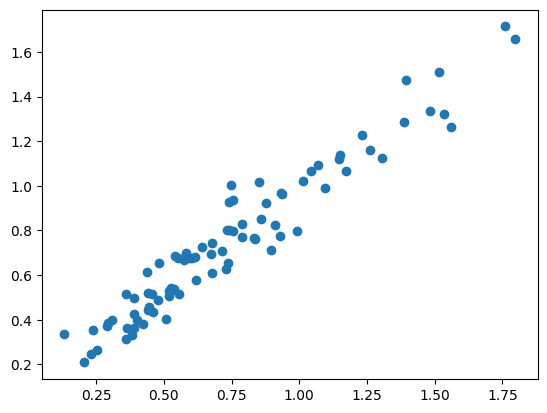

In [259]:
# Plot the predictions against the true values
plt.scatter(y_test, y_pred)

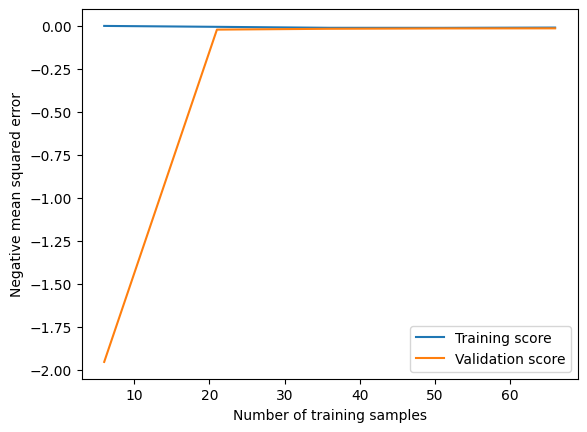

In [260]:
from sklearn.model_selection import learning_curve


# Calculate the learning curve
train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Plot the learning curve
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation score')
plt.legend()
plt.xlabel('Number of training samples')
plt.ylabel('Negative mean squared error')
plt.show()

In [261]:
#the gap is very small, so this suggests that the model is not underfitting or overfitting

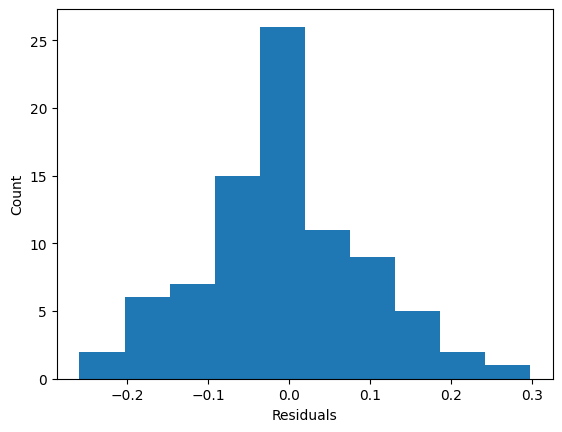

In [262]:
# Calculate the residuals
residuals = y_test - y_pred

# Plot the residuals
plt.hist(residuals)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.show()

In [263]:
#final_df2 is the dataframe we use to fill the missing values
final_df2.head()

,Month,$/lb_TM,$/lb_SP,Production,$/lb_FM,log_TM,log_FM,Month1_4,Month1_5,Month1_6,Month1_7,Month1_8,Month1_9,State_CALIFORNIA,State_GEORGIA,State_MICHIGAN,State_NEW JERSEY,State_NORTH CAROLINA,State_OREGON AND WASHINGTON,$/lb_TM_D
0,Apr 2011,7.000000,NaN,3.533504e+06,2.41,1.945910,0.879627,1,0,0,0,0,0,1,0,0,0,0,0,7.000000
1,Apr 2012,6.174074,4.556667,3.462811e+06,3.27,1.820359,1.184790,1,0,0,0,0,0,1,0,0,0,0,0,6.174074
2,Apr 2013,6.939655,5.200000,3.961171e+06,2.99,1.937252,1.095273,1,0,0,0,0,0,1,0,0,0,0,0,6.939655
3,Apr 2014,7.622521,6.033333,4.358530e+06,2.58,2.031107,0.947789,1,0,0,0,0,0,1,0,0,0,0,0,7.622521
4,Apr 2015,5.224560,3.088636,4.695349e+06,2.23,1.653371,0.802002,1,0,0,0,0,0,1,0,0,0,0,0,5.224560


In [264]:
#we create log of SP here
final_df2['log_SP']=final_df2["$/lb_SP"].apply(np.log)

In [265]:
#fill the null
X = final_df2.drop(columns=['$/lb_TM', '$/lb_SP', 'Production', '$/lb_FM', 'Month1_4',  'State_CALIFORNIA',
       'log_FM','$/lb_SP','log_SP','$/lb_TM_D','Month'])
y = final_df2['log_SP']


# Generate predictions for the missing values in the target column
y_pred = model.predict(X)

# Replace the missing values in the original dataset with the predictions
# Find the indices of the missing values in the 'lg_TM' column
null_indices = final_df2[final_df2['log_SP'].isnull()].index

# Iterate through the null indices and fill in the missing values
for i, null_index in enumerate(null_indices):
    final_df2.loc[null_index, 'log_SP'] = y_pred[i]

In [266]:
final_df2.head()

,Month,$/lb_TM,$/lb_SP,Production,$/lb_FM,log_TM,log_FM,Month1_4,Month1_5,Month1_6,...,Month1_8,Month1_9,State_CALIFORNIA,State_GEORGIA,State_MICHIGAN,State_NEW JERSEY,State_NORTH CAROLINA,State_OREGON AND WASHINGTON,$/lb_TM_D,log_SP
0,Apr 2011,7.000000,NaN,3.533504e+06,2.41,1.945910,0.879627,1,0,0,...,0,0,1,0,0,0,0,0,7.000000,1.599757
1,Apr 2012,6.174074,4.556667,3.462811e+06,3.27,1.820359,1.184790,1,0,0,...,0,0,1,0,0,0,0,0,6.174074,1.516591
2,Apr 2013,6.939655,5.200000,3.961171e+06,2.99,1.937252,1.095273,1,0,0,...,0,0,1,0,0,0,0,0,6.939655,1.648659
3,Apr 2014,7.622521,6.033333,4.358530e+06,2.58,2.031107,0.947789,1,0,0,...,0,0,1,0,0,0,0,0,7.622521,1.797300
4,Apr 2015,5.224560,3.088636,4.695349e+06,2.23,1.653371,0.802002,1,0,0,...,0,0,1,0,0,0,0,0,5.224560,1.127730


In [267]:
final_df2['$/lb_SP_D']=final_df2['log_SP'].apply(np.exp)

In [268]:
#remember that the production here is in lb

In [269]:
#no state dummies
import calendar

def get_state(row):
    for col in row.index:
        if col.startswith('State_') and row[col] == 1:
            return col.split('_')[1]
    return 'N/A'

final_df2['State'] = final_df2.apply(get_state, axis=1)


In [270]:
final_df2.tail()

,Month,$/lb_TM,$/lb_SP,Production,$/lb_FM,log_TM,log_FM,Month1_4,Month1_5,Month1_6,...,State_CALIFORNIA,State_GEORGIA,State_MICHIGAN,State_NEW JERSEY,State_NORTH CAROLINA,State_OREGON AND WASHINGTON,$/lb_TM_D,log_SP,$/lb_SP_D,State
393,Jun 2018,NaN,NaN,1.619259e+06,1.38,1.739221,0.322083,0,0,1,...,0,0,1,0,0,0,5.692908,0.963161,2.619966,MICHIGAN
394,Jun 2016,NaN,NaN,2.423642e+06,1.72,1.701490,0.542324,0,0,1,...,0,0,1,0,0,0,5.482108,0.968360,2.633621,MICHIGAN
395,Jun 2015,NaN,NaN,1.860159e+06,1.80,1.669295,0.587787,0,0,1,...,0,0,1,0,0,0,5.308423,1.120816,3.067357,MICHIGAN
396,Jun 2014,NaN,NaN,2.120233e+06,1.90,1.663603,0.641854,0,0,1,...,0,0,1,0,0,0,5.278297,1.286443,3.619887,MICHIGAN
397,Jun 2011,NaN,NaN,1.426831e+06,2.15,1.703777,0.765468,0,0,1,...,0,0,1,0,0,0,5.494660,0.925006,2.521883,MICHIGAN


In [271]:
#select necessary columns
final_df5=final_df2[['Month','Production','$/lb_TM_D','State','$/lb_SP_D','$/lb_FM']]

In [272]:
final_df5.State.value_counts()

CALIFORNIA               44
OREGON AND WASHINGTON    44
GEORGIA                  33
MICHIGAN                 33
NEW JERSEY               33
NORTH CAROLINA           22
Name: State, dtype: int64

In [273]:
#lets calculate the total production in each month year by group by
#average of '$/lb_TM_D','State','$/lb_SP_D','$/lb_FM' by month and year
#share of the states in total production in a month and year combination

In [274]:
final_df5

,Month,Production,$/lb_TM_D,State,$/lb_SP_D,$/lb_FM
0,Apr 2011,3.533504e+06,7.000000,CALIFORNIA,4.951828,2.41
1,Apr 2012,3.462811e+06,6.174074,CALIFORNIA,4.556667,3.27
2,Apr 2013,3.961171e+06,6.939655,CALIFORNIA,5.200000,2.99
3,Apr 2014,4.358530e+06,7.622521,CALIFORNIA,6.033333,2.58
4,Apr 2015,4.695349e+06,5.224560,CALIFORNIA,3.088636,2.23
...,...,...,...,...,...,...
393,Jun 2018,1.619259e+06,5.692908,MICHIGAN,2.619966,1.38
394,Jun 2016,2.423642e+06,5.482108,MICHIGAN,2.633621,1.72
395,Jun 2015,1.860159e+06,5.308423,MICHIGAN,3.067357,1.80
396,Jun 2014,2.120233e+06,5.278297,MICHIGAN,3.619887,1.90


In [275]:
final_df5.to_csv('Price_before_averageD.csv')

In [276]:
# First, we'll sum the production values by month
# create a new dataframe with month as the index
result_df = final_df5.set_index('Month')

# group by month and sum production
result_df = result_df.groupby(level=0).sum()

# calculate state share as a percentage of total production for each month
state_shares = final_df5.pivot_table(index='Month', values='Production', columns='State', aggfunc='sum')
state_shares = state_shares.divide(state_shares.sum(axis=1), axis=0)

# merge the state shares into the result_df
result_df = result_df.merge(state_shares, left_index=True, right_index=True)

# calculate the average of $/lb_SP_D, $/lb_TM_D, and $/lb_FM by month
result_df['$/lb_SP_D'] = final_df5.groupby('Month')['$/lb_SP_D'].mean()
result_df['$/lb_TM_D'] = final_df5.groupby('Month')['$/lb_TM_D'].mean()
result_df['$/lb_FM'] = final_df5.groupby('Month')['$/lb_FM'].mean()

# reset the index
result_df = result_df.reset_index()


In [277]:
final_df5[['Production']].applymap('{:,.2f}'.format)

,Production
0,"3,533,503.87"
1,"3,462,810.92"
2,"3,961,171.02"
3,"4,358,530.29"
4,"4,695,349.15"
...,...
393,"1,619,258.91"
394,"2,423,642.26"
395,"1,860,159.35"
396,"2,120,233.07"


In [278]:
result_df[['Production']].applymap('{:,.2f}'.format)

,Production
0,"6,806,820.99"
1,"6,256,765.95"
2,"6,952,530.14"
3,"8,952,368.62"
4,"8,769,983.92"
...,...
61,"8,148,367.87"
62,"8,961,270.22"
63,"10,728,480.40"
64,"10,178,957.13"


In [279]:
result_df

,Month,Production,$/lb_TM_D,$/lb_SP_D,$/lb_FM,CALIFORNIA,GEORGIA,MICHIGAN,NEW JERSEY,NORTH CAROLINA,OREGON AND WASHINGTON
0,Apr 2011,6.806821e+06,5.575000,3.493384,2.130,0.519112,0.480888,NaN,NaN,NaN,NaN
1,Apr 2012,6.256766e+06,5.175125,4.123030,2.635,0.553451,0.446549,NaN,NaN,NaN,NaN
2,Apr 2013,6.952530e+06,6.289828,4.800000,2.635,0.569745,0.430255,NaN,NaN,NaN,NaN
3,Apr 2014,8.952369e+06,6.777927,3.951360,2.140,0.486858,0.513142,NaN,NaN,NaN,NaN
4,Apr 2015,8.769984e+06,4.025462,2.723106,1.990,0.535389,0.464611,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
61,Sep 2017,8.148368e+06,3.984284,2.819481,1.780,NaN,NaN,NaN,NaN,NaN,1.0
62,Sep 2018,8.961270e+06,4.218273,2.809091,1.945,NaN,NaN,NaN,NaN,NaN,1.0
63,Sep 2019,1.072848e+07,2.633333,2.344545,1.520,NaN,NaN,NaN,NaN,NaN,1.0
64,Sep 2020,1.017896e+07,3.788843,2.857438,1.715,NaN,NaN,NaN,NaN,NaN,1.0


In [280]:
#the only null values persist in the share column for individual states 
#they should be zero

result_df.isnull().any()

Month                    False
Production               False
$/lb_TM_D                False
$/lb_SP_D                False
$/lb_FM                  False
CALIFORNIA                True
GEORGIA                   True
MICHIGAN                  True
NEW JERSEY                True
NORTH CAROLINA            True
OREGON AND WASHINGTON     True
dtype: bool

In [281]:
#lets fill all those with zero
result_df = result_df.fillna(0)

In [282]:
result_df.head()

,Month,Production,$/lb_TM_D,$/lb_SP_D,$/lb_FM,CALIFORNIA,GEORGIA,MICHIGAN,NEW JERSEY,NORTH CAROLINA,OREGON AND WASHINGTON
0,Apr 2011,6.806821e+06,5.575000,3.493384,2.130,0.519112,0.480888,0.0,0.0,0.0,0.0
1,Apr 2012,6.256766e+06,5.175125,4.123030,2.635,0.553451,0.446549,0.0,0.0,0.0,0.0
2,Apr 2013,6.952530e+06,6.289828,4.800000,2.635,0.569745,0.430255,0.0,0.0,0.0,0.0
3,Apr 2014,8.952369e+06,6.777927,3.951360,2.140,0.486858,0.513142,0.0,0.0,0.0,0.0
4,Apr 2015,8.769984e+06,4.025462,2.723106,1.990,0.535389,0.464611,0.0,0.0,0.0,0.0


In [283]:
final_df5.head()

,Month,Production,$/lb_TM_D,State,$/lb_SP_D,$/lb_FM
0,Apr 2011,3.533504e+06,7.000000,CALIFORNIA,4.951828,2.41
1,Apr 2012,3.462811e+06,6.174074,CALIFORNIA,4.556667,3.27
2,Apr 2013,3.961171e+06,6.939655,CALIFORNIA,5.200000,2.99
3,Apr 2014,4.358530e+06,7.622521,CALIFORNIA,6.033333,2.58
4,Apr 2015,4.695349e+06,5.224560,CALIFORNIA,3.088636,2.23


In [284]:
final_df5.groupby('Month')['$/lb_TM_D'].mean()

Month
Apr 2011    5.575000
Apr 2012    5.175125
Apr 2013    6.289828
Apr 2014    6.777927
Apr 2015    4.025462
              ...   
Sep 2017    3.984284
Sep 2018    4.218273
Sep 2019    2.633333
Sep 2020    3.788843
Sep 2021    5.167273
Name: $/lb_TM_D, Length: 66, dtype: float64

In [285]:
#now we save the file
result_df.to_csv('Final_States.csv')